<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_03_numpy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Helper Functions

str_style = '''
<style>
table {
  border-collapse: collapse;
}

td {
  border: 3px solid #666666;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

.up{
  position: absolute; 
  right: 0;
  top: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: blue;
  opacity: 1.0;
  background-color:rgba(0, 0, 0, 0.0);
}

.down{
  position: absolute; 
  right: 0;
  bottom: 0;
  background: white;
  text-align: right;
  font-size: 16px;
  font-family: Courier;
  font-weight: bolder;
  color: red;
  opacity: 0.9;
  background-color:rgba(0, 0, 0, 0.0);
}
</style>
'''

#background-color:rgba(0, 0, 0, 0.0);

def enclose_element(element, idx_up, idx_down):
  return ('\t<td>' + str(element) + '<span class="up">' 
                   + str(idx_up)  + '</span><span class="down">' 
                   + str(idx_down) + '</span></td>')

def horizontal_tbl(array, color):
  result = '<table bgcolor="' + color + '"><tr>\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += enclose_element(e, idx, idx - max_count) + '\n'
  result += '</tr></table>\n'
  return result

def vertical_tbl(array, color):
  result = '<table bgcolor="' + color + '">\n'
  max_count = len(array)
  for idx, e in enumerate(array):
    result += '<tr>' + enclose_element(e, idx, idx - max_count) + '</tr>\n'
  result += '</table>\n'
  return result

def recursive_tbl(array, parity, max_levels, level=0, color_A=[150,200,255], color_B=[75, 100, 170]):
  if len(array.shape) == 1:
    return horizontal_tbl(array, "".join(["%02x" % int(c) for c in color_A]))
  mix = np.array(color_A) * (level/max_levels) + np.array(color_B) * (1.0 - level/max_levels)
  color = "".join(["%02x" % int(c) for c in mix])
  if parity:
    return horizontal_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)
  else:
    return vertical_tbl([recursive_tbl(x, not parity, max_levels, level+1, color_A, color_B) for x in array], color)

def array_to_html(array):
  return str_style + recursive_tbl(array, len(array.shape) % 2, len(array.shape)-1)

def visualize_array(array):
  array_str = array_to_html(array)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(array_str))

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #ffd4d3ff;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

def envelope_tbl(lst):
  result = '<table class="bigtable">\n'
  for row in lst:
    result += '<tr>\n\t'
    for e in row:
      if isinstance(e, dict):
        result += '<td class="bigtd" '
        for key in e:
          if key != 'text':
            result += str(key) + '="' + str(e[key]) + '" '
        result += '>' + str(e['text']) + '</td>'
      else:
        result += '<td class="bigtd">' + str(e) + '</td>'
    result += '\n</tr>\n'
  result += '</table>'
  return result

def draw_tbl(lst):
  result = envelope_tbl(lst)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + result))


str_slide_html = '''
<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }
        

        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{ 
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }    
    .menu_style td{ 
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>
'''

def publish_slides(lst):
  result = '<div id="all_slides">'
  for e in lst:
    result += '<div>\n' + e + '\n</div>\n'
  result += '</div>\n'
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + str_slide_html + result))



#The Basics of NumPy Arrays

##NumPy Array Attributes

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [0]:
import numpy as np

np.random.seed(0) # seed for reproducibility
x = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

draw_tbl([["x = np.random.randint(10, size=(3, 4, 5))"],
          ["code", "output"],
          ["x.ndim ", x.ndim],
          ["x.shape", x.shape],
          ["x.size ", x.size],
          ["x.dtype ", x.dtype],
          ["x.itemsize (bytes)", x.itemsize],
          ["x.nbytes (bytes)", x.nbytes]])

##Array Indexing: Accessing Single Elements

In [0]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # One-dimensional array
x1

array([5, 0, 3, 3, 7, 9])

In [0]:
visualize_array(x1)

50-6,01-5,32-4,33-3,74-2,95-1


In [0]:
draw_tbl([['code:',  'x1[0]', 'x1[4]', 'x1[-1]', 'x1[-2]'],
          ['result:', x1[0] ,  x1[4] ,  x1[-1] ,  x1[-2] ]])

code:,x1[0],x1[4],x1[-1],x1[-2]
result:,5,7,9,7


In [0]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # One-dimensional array
x1_old = x1.copy()
x1[0] = 123.456789

draw_tbl([[array_to_html(x1_old), 'dtype = ' + str(x1.dtype)],
          ['x1[0] = 123.456789'],
          [array_to_html(x1), 'truncated!']])

In [0]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x2

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [0]:
visualize_array(x2)

50-4,01-3,32-2,33-1
70-4,91-3,32-2,53-1
20-4,41-3,72-2,63-1


In [0]:
draw_tbl([['code:',  'x2[0,0]', 'x2[2,0]', 'x2[2,-1]'],
          ['result:', x2[0,0] ,  x2[2,0] ,  x2[2,-1] ]])

code:,"x2[0,0]","x2[2,0]","x2[2,-1]"
result:,5,2,6


In [0]:
x2_old = x2.copy()
x2[0, 0] = 12
draw_tbl([['Initial', 'x2[0, 0] = 12'],
          [array_to_html(x2_old), array_to_html(x2)]])

##Array Slicing: Accessing Subarrays

In [0]:
#@title Indexing 1D array

str_ex_1 = '''
<svg width="98.037mm" height="16.462mm" version="1.1" viewBox="0 0 98.037 16.462" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-36.14 -9.4543)">
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="36.475" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="45.326" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="54.178" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="63.03" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="71.881" y="16.731" width="8.8516" height="8.8516"/>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="80.733" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="89.585" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="98.436" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="107.29" y="16.731" width="8.8516" height="8.8516"/>
   <rect x="116.14" y="16.731" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="39.164585" y="13.476597" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="39.164585" y="13.476597" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="48.377216" y="13.477852" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="48.377216" y="13.477852" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="57.047047" y="13.501475" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="57.047047" y="13.501475" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="65.886887" y="13.38645" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="65.886887" y="13.38645" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="74.539742" y="13.503381" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="74.539742" y="13.503381" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="83.453674" y="13.42299" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="83.453674" y="13.42299" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="92.127968" y="13.406981" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="92.127968" y="13.406981" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="101.3001" y="13.386451" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="101.3001" y="13.386451" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="110.05318" y="13.436563" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="110.05318" y="13.436563" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="119.45772" y="13.336337" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="119.45772" y="13.336337" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="126.75752" y="13.419859" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="126.75752" y="13.419859" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="124.99" y="16.731" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
 </g>
</svg>
'''
str_ex_2 = '''
<svg width="107.52mm" height="16.462mm" version="1.1" viewBox="0 0 107.52 16.462" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-35.908 -40.475)">
  <g fill="#0054ff" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <g fill-opacity=".0048309">
    <rect x="36.853" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="45.705" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="54.556" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="63.408" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="72.26" y="47.752" width="8.8516" height="8.8516"/>
   </g>
   <g fill-opacity=".16078">
    <rect x="81.111" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="89.963" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="98.814" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="107.67" y="47.752" width="8.8516" height="8.8516"/>
    <rect x="116.52" y="47.752" width="8.8516" height="8.8516"/>
   </g>
  </g>
  <text x="39.542854" y="44.497643" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="39.542854" y="44.497643" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
  <path d="m35.908 44.822h107.52" fill-opacity=".37681"/>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="48.755486" y="44.498898" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="48.755486" y="44.498898" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="57.425316" y="44.522522" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="57.425316" y="44.522522" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="66.265152" y="44.407494" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="66.265152" y="44.407494" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="74.918007" y="44.524426" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="74.918007" y="44.524426" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="83.83194" y="44.444035" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="83.83194" y="44.444035" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="92.506233" y="44.428028" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="92.506233" y="44.428028" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="101.67836" y="44.407494" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="101.67836" y="44.407494" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="110.43144" y="44.457607" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="110.43144" y="44.457607" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="119.83599" y="44.357384" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="119.83599" y="44.357384" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="127.1358" y="44.440903" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="127.1358" y="44.440903" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="125.37" y="47.752" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
 </g>
</svg>
'''
str_ex_3 = '''
<svg width="107.52mm" height="16.462mm" version="1.1" viewBox="0 0 107.52 16.462" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-36.309 -73.617)">
  <g fill="#0054ff" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <g fill-opacity=".0048309">
    <rect x="37.254" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="46.106" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="54.957" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="63.809" y="80.893" width="8.8516" height="8.8516"/>
   </g>
   <g fill-opacity=".16078">
    <rect x="72.66" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="81.512" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="90.364" y="80.893" width="8.8516" height="8.8516"/>
    <rect x="99.215" y="80.893" width="8.8516" height="8.8516"/>
   </g>
  </g>
  <rect x="108.07" y="80.893" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <rect x="116.92" y="80.893" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <text x="39.943764" y="77.639061" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="39.943764" y="77.639061" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
  <path d="m36.309 77.964h107.52" fill-opacity=".37681"/>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="49.156395" y="77.64032" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="49.156395" y="77.64032" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="57.826225" y="77.66394" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="57.826225" y="77.66394" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="66.666061" y="77.548912" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="66.666061" y="77.548912" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="75.318916" y="77.665848" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="75.318916" y="77.665848" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="84.232849" y="77.585457" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="84.232849" y="77.585457" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="92.907143" y="77.56945" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="92.907143" y="77.56945" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="102.07927" y="77.548912" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="102.07927" y="77.548912" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="110.83235" y="77.59903" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="110.83235" y="77.59903" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="120.23691" y="77.498802" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="120.23691" y="77.498802" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="127.53672" y="77.582321" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="127.53672" y="77.582321" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="125.77" y="80.893" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
 </g>
</svg>
'''
str_ex_4 = '''
<svg width="98.037mm" height="16.462mm" version="1.1" viewBox="0 0 98.037 16.462" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-37.31 -110.77)">
  <g fill="#0054ff" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="37.644" y="118.04" width="8.8516" height="8.8516" fill-opacity=".16078"/>
   <rect x="46.496" y="118.04" width="8.8516" height="8.8516" fill-opacity=".0048309"/>
   <rect x="55.347" y="118.04" width="8.8516" height="8.8516" fill-opacity=".16078"/>
   <rect x="64.199" y="118.04" width="8.8516" height="8.8516" fill-opacity=".0048309"/>
   <rect x="73.051" y="118.04" width="8.8516" height="8.8516" fill-opacity=".16078"/>
  </g>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="81.902" y="118.04" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="90.754" y="118.04" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="99.606" y="118.04" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="108.46" y="118.04" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="117.31" y="118.04" width="8.8516" height="8.8516" fill-opacity="0"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="40.333889" y="114.78953" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="40.333889" y="114.78953" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="49.54652" y="114.79079" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="49.54652" y="114.79079" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="58.216351" y="114.81441" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="58.216351" y="114.81441" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="67.05619" y="114.69937" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="67.05619" y="114.69937" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="75.709045" y="114.81631" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="75.709045" y="114.81631" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="84.622978" y="114.73592" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="84.622978" y="114.73592" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="93.297272" y="114.71992" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="93.297272" y="114.71992" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="102.4694" y="114.69937" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="102.4694" y="114.69937" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="111.22248" y="114.7495" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="111.22248" y="114.7495" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="120.62704" y="114.64926" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="120.62704" y="114.64926" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="127.92686" y="114.73279" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="127.92686" y="114.73279" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="126.16" y="118.04" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
 </g>
</svg>
'''
str_ex_5 = '''
<svg width="98.037mm" height="16.462mm" version="1.1" viewBox="0 0 98.037 16.462" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-37.978 -145.11)">
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="38.312" y="152.39" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="47.164" y="152.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="56.015" y="152.39" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="64.867" y="152.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="73.719" y="152.39" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="82.57" y="152.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="91.422" y="152.39" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="100.27" y="152.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
   <rect x="109.13" y="152.39" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="117.98" y="152.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".16078"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="41.002064" y="149.13367" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="41.002064" y="149.13367" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="50.214695" y="149.13493" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="50.214695" y="149.13493" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="58.884525" y="149.15855" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="58.884525" y="149.15855" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="67.724373" y="149.04352" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="67.724373" y="149.04352" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="76.37722" y="149.16045" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="76.37722" y="149.16045" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="85.291161" y="149.08006" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="85.291161" y="149.08006" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="93.965454" y="149.06406" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="93.965454" y="149.06406" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="103.13757" y="149.04352" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="103.13757" y="149.04352" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="111.89066" y="149.09364" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="111.89066" y="149.09364" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="121.29522" y="148.99341" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="121.29522" y="148.99341" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="128.59503" y="149.07693" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="128.59503" y="149.07693" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="126.83" y="152.39" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
 </g>
</svg>
'''
str_ex_6 = '''
<svg width="98.705mm" height="39.05mm" version="1.1" viewBox="0 0 98.705 39.05" xmlns="http://www.w3.org/2000/svg">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".55072" fill-rule="evenodd" stroke="#000" stroke-opacity=".55072" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-37.844 -180.12)">
  <rect x="38.179" y="187.4" width="8.8516" height="8.8516" fill="#00f" fill-opacity=".039216" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="47.03" y="187.4" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect x="55.882" y="187.4" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect x="64.733" y="187.4" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect x="73.585" y="187.4" width="8.8516" height="8.8516" fill-opacity=".19608"/>
   <rect x="82.437" y="187.4" width="8.8516" height="8.8516" fill-opacity=".23529"/>
   <rect x="91.288" y="187.4" width="8.8516" height="8.8516" fill-opacity=".27451"/>
   <rect x="100.14" y="187.4" width="8.8516" height="8.8516" fill-opacity=".31373"/>
   <rect x="108.99" y="187.4" width="8.8516" height="8.8516" fill-opacity=".35294"/>
   <rect x="117.84" y="187.4" width="8.8516" height="8.8516" fill-opacity=".39216"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="40.868423" y="184.14597" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="40.868423" y="184.14597" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="50.081055" y="184.14723" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="50.081055" y="184.14723" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="58.750885" y="184.17085" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="58.750885" y="184.17085" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="67.590729" y="184.05582" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="67.590729" y="184.05582" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="76.243576" y="184.17274" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="76.243576" y="184.17274" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="85.157516" y="184.09236" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="85.157516" y="184.09236" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="93.831818" y="184.07635" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="93.831818" y="184.07635" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="103.00393" y="184.05582" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="103.00393" y="184.05582" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="111.75702" y="184.10594" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="111.75702" y="184.10594" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="121.16158" y="184.00571" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="121.16158" y="184.00571" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="128.4614" y="184.08923" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="128.4614" y="184.08923" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="126.7" y="187.4" width="8.8516" height="8.8516" fill-opacity=".39216" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <rect transform="scale(-1)" x="-136.21" y="-218.84" width="8.8516" height="8.8516" fill="#00f" fill-opacity=".039216" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect transform="scale(-1)" x="-127.36" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect transform="scale(-1)" x="-118.51" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect transform="scale(-1)" x="-109.66" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1)" x="-100.81" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".19608"/>
   <rect transform="scale(-1)" x="-91.957" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".23529"/>
   <rect transform="scale(-1)" x="-83.105" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".27451"/>
   <rect transform="scale(-1)" x="-74.253" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".31373"/>
   <rect transform="scale(-1)" x="-65.402" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".35294"/>
   <rect transform="scale(-1)" x="-56.55" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".39216"/>
   <rect transform="scale(-1)" x="-47.698" y="-218.84" width="8.8516" height="8.8516" fill-opacity=".39216"/>
  </g>
  <path d="m88.333 198.32v8.5526" fill="none" marker-end="url(#a)" stroke="#000" stroke-opacity=".55072" stroke-width=".465"/>
 </g>
</svg>
'''
str_ex_7 = '''
<svg width="98.169mm" height="39.459mm" version="1.1" viewBox="0 0 98.169 39.459" xmlns="http://www.w3.org/2000/svg">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".55072" fill-rule="evenodd" stroke="#000" stroke-opacity=".55072" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-39.65 -236.32)">
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="40.116" y="243.59" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="48.968" y="243.59" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".078431"/>
   <rect x="57.82" y="243.59" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="66.671" y="243.59" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".15686"/>
   <rect x="75.523" y="243.59" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="84.374" y="243.59" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".23529"/>
   <rect x="93.226" y="243.59" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="102.08" y="243.59" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".31373"/>
   <rect x="110.93" y="243.59" width="8.8516" height="8.8516" fill-opacity="0"/>
   <rect x="119.78" y="243.59" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".39216"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="42.806126" y="240.33759" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="42.806126" y="240.33759" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="52.018757" y="240.33885" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="52.018757" y="240.33885" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="60.688587" y="240.36247" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="60.688587" y="240.36247" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="69.528435" y="240.24744" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="69.528435" y="240.24744" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="78.181274" y="240.36436" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="78.181274" y="240.36436" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="87.095215" y="240.28398" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="87.095215" y="240.28398" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="95.769524" y="240.26797" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="95.769524" y="240.26797" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
   <text x="104.94163" y="240.24744" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="104.94163" y="240.24744" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">7</tspan></text>
   <text x="113.69472" y="240.29756" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="113.69472" y="240.29756" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">8</tspan></text>
   <text x="123.09929" y="240.19733" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="123.09929" y="240.19733" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">9</tspan></text>
   <text x="130.39909" y="240.28085" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="130.39909" y="240.28085" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">10</tspan></text>
  </g>
  <rect x="128.63" y="243.59" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <path d="m91.339 254.97v8.5526" fill="none" marker-end="url(#a)" stroke="#000" stroke-opacity=".55072" stroke-width=".465"/>
  <g fill="#0054ff" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect transform="scale(-1,1)" x="-75.391" y="266.59" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1,1)" x="-66.539" y="266.59" width="8.8516" height="8.8516" fill-opacity=".23529"/>
   <rect transform="scale(-1,1)" x="-57.688" y="266.59" width="8.8516" height="8.8516" fill-opacity=".31373"/>
   <rect transform="scale(-1,1)" x="-48.836" y="266.59" width="8.8516" height="8.8516" fill-opacity=".39216"/>
  </g>
 </g>
</svg>
'''

def do_example():
  e1 = envelope_tbl([['code', 'result'], ['x[:5]', str_ex_1]])
  e2 = envelope_tbl([['code', 'result'], ['x[5:]', str_ex_2]])
  e3 = envelope_tbl([['code', 'result'], ['x[4:7]', str_ex_3]])
  e4 = envelope_tbl([['code', 'result'], ['x[::2]', str_ex_4]])
  e5 = envelope_tbl([['code', 'result'], ['x[1::2]', str_ex_5]])
  e6 = envelope_tbl([['code', 'result'], ['x[::-1]', str_ex_6]])
  e7 = envelope_tbl([['code', 'result'], ['x[9::-2]', str_ex_7]])
  publish_slides([e1,e2,e3,e4,e5,e6,e7])

do_example()


In [0]:
#@title Indexing 2D array

str_ex_8 = '''
<svg width="60.594mm" height="51.819mm" version="1.1" viewBox="0 0 60.594 51.819" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-32.51 -300.31)">
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.659" y="307.54" width="8.8516" height="8.8516"/>
   <rect x="48.511" y="307.54" width="8.8516" height="8.8516"/>
   <rect x="57.363" y="307.54" width="8.8516" height="8.8516"/>
   <rect x="66.214" y="307.54" width="8.8516" height="8.8516"/>
   <rect x="75.066" y="307.54" width="8.8516" height="8.8516"/>
  </g>
  <rect x="83.918" y="307.54" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="42.349182" y="304.28363" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="42.349182" y="304.28363" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="51.561813" y="304.28488" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="51.561813" y="304.28488" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="60.231644" y="304.3085" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="60.231644" y="304.3085" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="69.071487" y="304.19348" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="69.071487" y="304.19348" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="77.724342" y="304.31042" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="77.724342" y="304.31042" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="86.638275" y="304.23001" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="86.638275" y="304.23001" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.659" y="316.39" width="8.8516" height="8.8516"/>
   <rect x="48.511" y="316.39" width="8.8516" height="8.8516"/>
   <rect x="57.363" y="316.39" width="8.8516" height="8.8516"/>
   <rect x="66.214" y="316.39" width="8.8516" height="8.8516"/>
   <rect x="75.066" y="316.39" width="8.8516" height="8.8516"/>
  </g>
  <rect x="83.918" y="316.39" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.659" y="325.24" width="8.8516" height="8.8516"/>
   <rect x="48.511" y="325.24" width="8.8516" height="8.8516"/>
   <rect x="57.363" y="325.24" width="8.8516" height="8.8516"/>
   <rect x="66.214" y="325.24" width="8.8516" height="8.8516"/>
   <rect x="75.066" y="325.24" width="8.8516" height="8.8516"/>
  </g>
  <rect x="83.918" y="325.24" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.659" y="334.09" width="8.8516" height="8.8516"/>
   <rect x="48.511" y="334.09" width="8.8516" height="8.8516"/>
   <rect x="57.363" y="334.09" width="8.8516" height="8.8516"/>
   <rect x="66.214" y="334.09" width="8.8516" height="8.8516"/>
   <rect x="75.066" y="334.09" width="8.8516" height="8.8516"/>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="83.918" y="334.09" width="8.8516" height="8.8516"/>
   <rect x="39.659" y="342.94" width="8.8516" height="8.8516"/>
   <rect x="48.511" y="342.94" width="8.8516" height="8.8516"/>
   <rect x="57.363" y="342.94" width="8.8516" height="8.8516"/>
   <rect x="66.214" y="342.94" width="8.8516" height="8.8516"/>
   <rect x="75.066" y="342.94" width="8.8516" height="8.8516"/>
   <rect x="83.918" y="342.94" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="32.377968" y="314.46558" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.377968" y="314.46558" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="32.168564" y="323.5567" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.168564" y="323.5567" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="32.18816" y="332.06116" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.18816" y="332.06116" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="32.323467" y="340.66351" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.323467" y="340.66351" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="32.222683" y="349.82504" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.222683" y="349.82504" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
 </g>
</svg>
'''
str_ex_9 = '''
<svg width="60.594mm" height="51.819mm" version="1.1" viewBox="0 0 60.594 51.819" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-168.18 -300.1)">
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="175.33" y="307.32" width="8.8516" height="8.8516"/>
   <rect x="184.18" y="307.32" width="8.8516" height="8.8516"/>
   <rect x="193.03" y="307.32" width="8.8516" height="8.8516"/>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="201.88" y="307.32" width="8.8516" height="8.8516"/>
   <rect x="210.73" y="307.32" width="8.8516" height="8.8516"/>
   <rect x="219.59" y="307.32" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="178.01706" y="304.07059" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="178.01706" y="304.07059" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="187.22969" y="304.07184" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="187.22969" y="304.07184" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="195.89952" y="304.09546" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="195.89952" y="304.09546" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="204.73936" y="303.98044" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="204.73936" y="303.98044" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="213.39223" y="304.09738" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="213.39223" y="304.09738" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="222.30615" y="304.01697" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="222.30615" y="304.01697" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="175.33" y="316.18" width="8.8516" height="8.8516"/>
   <rect x="184.18" y="316.18" width="8.8516" height="8.8516"/>
   <rect x="193.03" y="316.18" width="8.8516" height="8.8516"/>
   <rect x="201.88" y="316.18" width="8.8516" height="8.8516"/>
   <rect x="210.73" y="316.18" width="8.8516" height="8.8516"/>
   <rect x="219.59" y="316.18" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#0054ff" fill-opacity=".15942" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="175.33" y="325.03" width="8.8516" height="8.8516"/>
   <rect x="184.18" y="325.03" width="8.8516" height="8.8516"/>
   <rect x="193.03" y="325.03" width="8.8516" height="8.8516"/>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="201.88" y="325.03" width="8.8516" height="8.8516"/>
   <rect x="210.73" y="325.03" width="8.8516" height="8.8516"/>
   <rect x="219.59" y="325.03" width="8.8516" height="8.8516"/>
   <rect x="175.33" y="333.88" width="8.8516" height="8.8516"/>
   <rect x="184.18" y="333.88" width="8.8516" height="8.8516"/>
   <rect x="193.03" y="333.88" width="8.8516" height="8.8516"/>
   <rect x="201.88" y="333.88" width="8.8516" height="8.8516"/>
   <rect x="210.73" y="333.88" width="8.8516" height="8.8516"/>
   <rect x="219.59" y="333.88" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#0054ff" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="175.33" y="342.73" width="8.8516" height="8.8516"/>
   <rect x="184.18" y="342.73" width="8.8516" height="8.8516"/>
   <rect x="193.03" y="342.73" width="8.8516" height="8.8516"/>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="201.88" y="342.73" width="8.8516" height="8.8516"/>
   <rect x="210.73" y="342.73" width="8.8516" height="8.8516"/>
   <rect x="219.59" y="342.73" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="168.04585" y="314.25253" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="168.04585" y="314.25253" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="167.83644" y="323.34366" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="167.83644" y="323.34366" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="167.85605" y="331.84811" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="167.85605" y="331.84811" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="167.99135" y="340.45047" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="167.99135" y="340.45047" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="167.89056" y="349.612" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="167.89056" y="349.612" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
 </g>
</svg>
'''
str_ex_10 = '''
<svg width="60.594mm" height="51.819mm" version="1.1" viewBox="0 0 60.594 51.819" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-32.138 -376.8)">
  <g fill="#0054ff" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.287" y="384.03" width="8.8516" height="8.8516"/>
   <rect x="48.139" y="384.03" width="8.8516" height="8.8516"/>
   <rect x="56.99" y="384.03" width="8.8516" height="8.8516"/>
   <rect x="65.842" y="384.03" width="8.8516" height="8.8516"/>
   <rect x="74.694" y="384.03" width="8.8516" height="8.8516"/>
   <rect x="83.545" y="384.03" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="41.976875" y="380.77695" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="41.976875" y="380.77695" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="51.189507" y="380.7782" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="51.189507" y="380.7782" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="59.859337" y="380.80182" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="59.859337" y="380.80182" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="68.699181" y="380.6868" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="68.699181" y="380.6868" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="77.352036" y="380.80374" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="77.352036" y="380.80374" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="86.265968" y="380.72333" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="86.265968" y="380.72333" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="39.287" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="48.139" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="56.99" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="65.842" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="74.694" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="83.545" y="392.88" width="8.8516" height="8.8516"/>
   <rect x="39.287" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="48.139" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="56.99" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="65.842" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="74.694" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="83.545" y="401.73" width="8.8516" height="8.8516"/>
   <rect x="39.287" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="48.139" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="56.99" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="65.842" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="74.694" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="83.545" y="410.59" width="8.8516" height="8.8516"/>
   <rect x="39.287" y="419.44" width="8.8516" height="8.8516"/>
   <rect x="48.139" y="419.44" width="8.8516" height="8.8516"/>
   <rect x="56.99" y="419.44" width="8.8516" height="8.8516"/>
   <rect x="65.842" y="419.44" width="8.8516" height="8.8516"/>
   <rect x="74.694" y="419.44" width="8.8516" height="8.8516"/>
   <rect x="83.545" y="419.44" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="32.005661" y="390.95889" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="32.005661" y="390.95889" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="31.796257" y="400.05002" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.796257" y="400.05002" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="31.815853" y="408.55447" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.815853" y="408.55447" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="31.95116" y="417.15683" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.95116" y="417.15683" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="31.850376" y="426.31836" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.850376" y="426.31836" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
 </g>
</svg>
'''
str_ex_11 = '''
<svg width="60.594mm" height="51.819mm" version="1.1" viewBox="0 0 60.594 51.819" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-32.076 -445.59)">
  <rect x="39.225" y="452.81" width="8.8516" height="8.8516" fill="#0054fb" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="48.077" y="452.81" width="8.8516" height="8.8516"/>
   <rect x="56.928" y="452.81" width="8.8516" height="8.8516"/>
   <rect x="65.78" y="452.81" width="8.8516" height="8.8516"/>
   <rect x="74.632" y="452.81" width="8.8516" height="8.8516"/>
   <rect x="83.483" y="452.81" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="41.914806" y="449.55969" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="41.914806" y="449.55969" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="51.127438" y="449.56094" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="51.127438" y="449.56094" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="59.797268" y="449.58456" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="59.797268" y="449.58456" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="68.637115" y="449.46954" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="68.637115" y="449.46954" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="77.289963" y="449.58649" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="77.289963" y="449.58649" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="86.203903" y="449.50607" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="86.203903" y="449.50607" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <rect x="39.225" y="461.67" width="8.8516" height="8.8516" fill="#0054fb" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="48.077" y="461.67" width="8.8516" height="8.8516"/>
   <rect x="56.928" y="461.67" width="8.8516" height="8.8516"/>
   <rect x="65.78" y="461.67" width="8.8516" height="8.8516"/>
   <rect x="74.632" y="461.67" width="8.8516" height="8.8516"/>
   <rect x="83.483" y="461.67" width="8.8516" height="8.8516"/>
  </g>
  <rect x="39.225" y="470.52" width="8.8516" height="8.8516" fill="#0054fb" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="48.077" y="470.52" width="8.8516" height="8.8516"/>
   <rect x="56.928" y="470.52" width="8.8516" height="8.8516"/>
   <rect x="65.78" y="470.52" width="8.8516" height="8.8516"/>
   <rect x="74.632" y="470.52" width="8.8516" height="8.8516"/>
   <rect x="83.483" y="470.52" width="8.8516" height="8.8516"/>
  </g>
  <rect x="39.225" y="479.37" width="8.8516" height="8.8516" fill="#0054fb" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="48.077" y="479.37" width="8.8516" height="8.8516"/>
   <rect x="56.928" y="479.37" width="8.8516" height="8.8516"/>
   <rect x="65.78" y="479.37" width="8.8516" height="8.8516"/>
   <rect x="74.632" y="479.37" width="8.8516" height="8.8516"/>
   <rect x="83.483" y="479.37" width="8.8516" height="8.8516"/>
  </g>
  <rect x="39.225" y="488.22" width="8.8516" height="8.8516" fill="#0054fb" fill-opacity=".16078" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="48.077" y="488.22" width="8.8516" height="8.8516"/>
   <rect x="56.928" y="488.22" width="8.8516" height="8.8516"/>
   <rect x="65.78" y="488.22" width="8.8516" height="8.8516"/>
   <rect x="74.632" y="488.22" width="8.8516" height="8.8516"/>
   <rect x="83.483" y="488.22" width="8.8516" height="8.8516"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="31.943592" y="459.74164" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.943592" y="459.74164" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="31.734188" y="468.83276" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.734188" y="468.83276" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="31.753784" y="477.33722" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.753784" y="477.33722" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="31.889091" y="485.93958" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.889091" y="485.93958" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="31.788307" y="495.1011" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="31.788307" y="495.1011" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
 </g>
</svg>
'''
str_ex_12 = '''
<svg width="149.66mm" height="52.507mm" version="1.1" viewBox="0 0 149.66 52.507" xmlns="http://www.w3.org/2000/svg">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".55072" fill-rule="evenodd" stroke="#000" stroke-opacity=".55072" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-166.15 -374.91)">
  <rect x="173.3" y="382.82" width="8.8516" height="8.8516" fill-opacity="0" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="182.15" y="382.82" width="8.8516" height="8.8516" fill-opacity=".039216"/>
   <rect x="191" y="382.82" width="8.8516" height="8.8516" fill-opacity=".058824"/>
   <rect x="199.85" y="382.82" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect x="208.7" y="382.82" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect x="217.55" y="382.82" width="8.8516" height="8.8516" fill-opacity=".11765"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="175.98546" y="379.56506" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="175.98546" y="379.56506" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="185.19809" y="379.56631" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="185.19809" y="379.56631" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="193.86794" y="379.58994" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="193.86794" y="379.58994" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="202.70778" y="379.47491" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="202.70778" y="379.47491" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="211.36063" y="379.59186" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="211.36063" y="379.59186" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="220.27457" y="379.51144" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="220.27457" y="379.51144" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect x="173.3" y="391.67" width="8.8516" height="8.8516" fill-opacity=".039216"/>
   <rect x="182.15" y="391.67" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect x="191" y="391.67" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect x="199.85" y="391.67" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect x="208.7" y="391.67" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect x="217.55" y="391.67" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect x="173.3" y="400.52" width="8.8516" height="8.8516" fill-opacity=".058824"/>
   <rect x="182.15" y="400.52" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect x="191" y="400.52" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect x="199.85" y="400.52" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect x="208.7" y="400.52" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect x="217.55" y="400.52" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect x="173.3" y="409.37" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect x="182.15" y="409.37" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect x="191" y="409.37" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect x="199.85" y="409.37" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect x="208.7" y="409.37" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect x="217.55" y="409.37" width="8.8516" height="8.8516" fill-opacity=".17647"/>
   <rect x="173.3" y="418.23" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect x="182.15" y="418.23" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect x="191" y="418.23" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect x="199.85" y="418.23" width="8.8516" height="8.8516" fill-opacity=".17647"/>
   <rect x="208.7" y="418.23" width="8.8516" height="8.8516" fill-opacity=".19608"/>
   <rect x="217.55" y="418.23" width="8.8516" height="8.8516" fill-opacity=".21569"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="166.01425" y="389.74701" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="166.01425" y="389.74701" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="165.80484" y="398.83813" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="165.80484" y="398.83813" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="165.82445" y="407.34259" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="165.82445" y="407.34259" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="165.95975" y="415.94495" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="165.95975" y="415.94495" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="165.85896" y="425.10648" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="165.85896" y="425.10648" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
  <rect transform="scale(-1)" x="-315.48" y="-426.39" width="8.8516" height="8.8516" fill="#00f" fill-opacity=".014493" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <rect transform="scale(-1)" x="-306.62" y="-426.39" width="8.8516" height="8.8516" fill="#0054ff" fill-opacity=".039216" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669"/>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect transform="scale(-1)" x="-297.77" y="-426.39" width="8.8516" height="8.8516" fill-opacity=".058824"/>
   <rect transform="scale(-1)" x="-288.92" y="-426.39" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect transform="scale(-1)" x="-280.07" y="-426.39" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect transform="scale(-1)" x="-271.22" y="-426.39" width="8.8516" height="8.8516" fill-opacity=".11765"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="265.05655" y="378.87738" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="265.05655" y="378.87738" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="274.26917" y="378.87863" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="274.26917" y="378.87863" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="282.93903" y="378.90225" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="282.93903" y="378.90225" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="291.77887" y="378.78723" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="291.77887" y="378.78723" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="300.4317" y="378.90417" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="300.4317" y="378.90417" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="309.34564" y="378.82376" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="309.34564" y="378.82376" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
  </g>
  <g stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".12941" stroke-width=".669">
   <rect transform="scale(-1)" x="-315.48" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".039216"/>
   <rect transform="scale(-1)" x="-306.62" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect transform="scale(-1)" x="-297.77" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect transform="scale(-1)" x="-288.92" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect transform="scale(-1)" x="-280.07" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect transform="scale(-1)" x="-271.22" y="-417.54" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1)" x="-315.48" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".058824"/>
   <rect transform="scale(-1)" x="-306.62" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect transform="scale(-1)" x="-297.77" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect transform="scale(-1)" x="-288.92" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect transform="scale(-1)" x="-280.07" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect transform="scale(-1)" x="-271.22" y="-408.69" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1)" x="-315.48" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".078431"/>
   <rect transform="scale(-1)" x="-306.62" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect transform="scale(-1)" x="-297.77" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".11765"/>
   <rect transform="scale(-1)" x="-288.92" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect transform="scale(-1)" x="-280.07" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1)" x="-271.22" y="-399.83" width="8.8516" height="8.8516" fill-opacity=".17647"/>
   <rect transform="scale(-1)" x="-315.48" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".098039"/>
   <rect transform="scale(-1)" x="-306.62" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".13725"/>
   <rect transform="scale(-1)" x="-297.77" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".15686"/>
   <rect transform="scale(-1)" x="-288.92" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".17647"/>
   <rect transform="scale(-1)" x="-280.07" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".19608"/>
   <rect transform="scale(-1)" x="-271.22" y="-390.98" width="8.8516" height="8.8516" fill-opacity=".21569"/>
  </g>
  <g fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" letter-spacing="0px" stroke-opacity=".21739" stroke-width=".26458" word-spacing="0px">
   <text x="255.08534" y="389.05933" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="255.08534" y="389.05933" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="254.87593" y="398.15045" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="254.87593" y="398.15045" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="254.89554" y="406.65491" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="254.89554" y="406.65491" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="255.03084" y="415.25726" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="255.03084" y="415.25726" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="254.93005" y="424.41879" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="254.93005" y="424.41879" fill="#000000" fill-opacity=".47059" font-family="'Courier New'" font-size="5.9912px" font-weight="bold" stroke-opacity=".21739" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
  <path d="m238.54 404.65h8.5526" fill="none" marker-end="url(#a)" stroke="#000" stroke-opacity=".55072" stroke-width=".465"/>
 </g>
</svg>
'''

def do_example():
  e1 = envelope_tbl([['code', 'result'], ['x2[:4, :5]', str_ex_8]])
  e2 = envelope_tbl([['code', 'result'], ['x2[::2,:3]', str_ex_9]])
  e3 = envelope_tbl([['code', 'result'], ['x2[0, :]', str_ex_10]])
  e4 = envelope_tbl([['code', 'result'], ['x2[0]', str_ex_10]])
  e5 = envelope_tbl([['code', 'result'], ['x2[:, 0]', str_ex_11]])
  e6 = envelope_tbl([['&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;code&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;', 'result'], ['x2[::-1, ::-1]', str_ex_12]])
  publish_slides([e1,e2,e3,e4,e5,e6])

do_example()


##Memory management during slicing

In [0]:
import numpy as np

x2 = np.array([['0,0', '1,0', '2,0', '3,0'],
               ['0,1', '1,1', '2,1', '3,1'],
               ['0,2', '1,2', '2,2', '3,2'],
               ['0,3', '1,3', '2,3', '3,3']])
x2_sub = x2[:2, :2]

draw_tbl([['x2', 'x2_sub'],
          [array_to_html(x2), array_to_html(x2_sub)]])

In [0]:
x2_sub[0,0] = '***'
draw_tbl([['x2', 'x2_sub'],
          [array_to_html(x2), array_to_html(x2_sub)]])

In [0]:
import numpy as np

x2 = np.array([['0,0', '1,0', '2,0', '3,0'],
               ['0,1', '1,1', '2,1', '3,1'],
               ['0,2', '1,2', '2,2', '3,2'],
               ['0,3', '1,3', '2,3', '3,3']])
x2_sub = x2[:2, :2].copy()

draw_tbl([['x2', 'x2_sub'],
          [array_to_html(x2), array_to_html(x2_sub)]])

In [0]:
x2_sub[0,0] = '***'
draw_tbl([['x2', 'x2_sub'],
          [array_to_html(x2), array_to_html(x2_sub)]])

##Reshaping of Arrays

In [0]:
draw_tbl([['np.arange(1, 10)', 'np.arange(1, 10).reshape((3, 3))'],
          [array_to_html(np.arange(1, 10)), array_to_html(np.arange(1, 10).reshape((3, 3)))]])

In [0]:
x = np.array([1, 2, 3])
draw_tbl([['np.array([1, 2, 3])', 
           'np.array([1, 2, 3]).reshape((1, 3))<br>or<br>x[np.newaxis, :]',
           'np.array([1, 2, 3]).reshape((3, 1))<br>or<br>x[:, np.newaxis]'],
          [array_to_html(x), array_to_html(x.reshape((1, 3))), array_to_html(x.reshape((3, 1)))]])

##Array Concatenation and Splitting

In [0]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
draw_tbl([['x', 'y'], 
          [array_to_html(x), array_to_html(y)],
          [{'text': 'np.concatenate([x, y])', 'colspan': 2}],
          [{'text': array_to_html(np.concatenate([x, y])), 'colspan': 2}]])

In [0]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [99, 99, 99]
print('np.array can be concatenated with simple list')
draw_tbl([['x', 'y', 'z'], 
          [array_to_html(x), array_to_html(y), z],
          [{'text': 'np.concatenate([x, y, z])', 'colspan': 3}],
          [{'text': array_to_html(np.concatenate([x, y, z])), 'colspan': 3}]])

np.array can be concatenated with simple list


In [0]:
gridA = np.array([[1, 2, 3], [4, 5, 6]])
gridB = np.array([[6, 5, 4], [3, 2, 1]])

draw_tbl([['gridA', 'gridB', 'np.concatenate([gridA, gridB])'], 
          [array_to_html(gridA), array_to_html(gridB), array_to_html(np.concatenate([gridA, gridB]))]])

gridA,gridB,"np.concatenate([gridA, gridB])"
10-3,21-2,32-1
40-3,51-2,62-1
60-3,51-2,42-1
30-3,21-2,12-1
10-3,21-2,32-1
40-3,51-2,62-1
60-3,51-2,42-1
30-3,21-2,12-1


In [0]:
gridA = np.array([[1, 2, 3], [4, 5, 6]])
gridB = np.array([[6, 5, 4], [3, 2, 1]])

draw_tbl([['gridA', 'gridB'], 
          [array_to_html(gridA), array_to_html(gridB)],
          [{'text': 'np.concatenate([gridA, gridB], axis=1)', 'colspan': 2}],
          [{'text': array_to_html(np.concatenate([gridA, gridB], axis=1)), 'colspan': 2}]])

In [0]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])

draw_tbl([['x', 'grid', 'np.vstack([x, grid])'], 
          [array_to_html(x), array_to_html(grid), array_to_html(np.vstack([x, grid]))]])

x,grid,"np.vstack([x, grid])"
10-3,21-2,32-1
90-3,81-2,72-1
60-3,51-2,42-1
10-3,21-2,32-1
90-3,81-2,72-1
60-3,51-2,42-1


In [0]:
grid = np.array([[9, 8, 7], [6, 5, 4]])
y = np.array([[99], [99]])

draw_tbl([['y', 'grid', 'np.hstack([grid, y])'], 
          [array_to_html(y), array_to_html(grid), array_to_html(np.hstack([grid, y]))]])

In [0]:
x = np.array([1, 2, 3, 99, 99, 3, 2, 1])
x1, x2, x3 = np.split(x, [3, 5])

draw_tbl([[{'text': 'x', 'colspan': 3}],
          [{'text': array_to_html(x), 'colspan': 3}],
          [{'text': 'x1, x2, x3 = np.split(x, [3, 5]) # by section indices', 'colspan': 3}],
          ['x1', 'x2', 'x3'],
          [array_to_html(x1), array_to_html(x2), array_to_html(x3)]])

In [0]:
x = np.array([1, 2, 3, 99, 99, 3, 2, 1])
x1, x2, x3, x4 = np.split(x, 4)

draw_tbl([[{'text': 'x', 'colspan': 4}],
          [{'text': array_to_html(x), 'colspan': 4}],
          [{'text': 'x1, x2, x3, x4 = np.split(x, 4) # by number of chunks', 'colspan': 4}],
          ['x1', 'x2', 'x3', 'x4'],
          [array_to_html(x1), array_to_html(x2), array_to_html(x3), array_to_html(x4)]])

In [0]:
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, [2])
left, right = np.hsplit(grid, [2])

draw_tbl([['grid', 'upper, lower = np.vsplit(grid, [2])', {'text': 'left, right = np.hsplit(grid, [2])', 'colspan': 2}],
          [{'text':array_to_html(grid), 'rowspan':4}, 'upper', 'left', 'right'],
          [array_to_html(upper), {'text': array_to_html(left), 'rowspan':3}, {'text': array_to_html(right), 'rowspan':3}],
          ['lower'],
          [array_to_html(lower)]])

#Computation on NumPy Arrays: Universal Functions

##The Slowness of Loops

In [0]:
import numpy as np
np.random.seed(0)


def sum_arrays(arr1, arr2):
  output = np.empty(len(arr1))
  for i in range(len(arr1)):
    output[i] = arr1[i] + arr2[i]
  return output

sz = 5
values1 = np.random.randint(1, 10, size=sz)
values2 = np.random.randint(1, 10, size=sz)
sum_arrays(values1, values2)

array([10.,  7.,  7.,  9., 16.])

In [0]:
sz = 1000000
big_array1 = np.random.randint(1, 100, size=sz)
big_array2 = np.random.randint(1, 100, size=sz)
%timeit sum_arrays(big_array1, big_array2)

1 loop, best of 3: 446 ms per loop


##Introducing UFuncs

In [0]:
import numpy as np

sz = 5
values1 = np.random.randint(1, 10, size=sz)
values2 = np.random.randint(1, 10, size=sz)

draw_tbl([['', 'code'], 
          [array_to_html(values1), 'values1 = np.random.randint(1, 10, size=sz)'],
          #[{'text': '+', 'colspan': 2}],
          [array_to_html(values2), 'values2 = np.random.randint(1, 10, size=sz)'],
          #[{'text': '=', 'colspan': 2}],
          [array_to_html(values1 + values2), 'values1 + values2']])

In [0]:
%timeit big_array1 + big_array2

1000 loops, best of 3: 1.69 ms per loop


##Exploring NumPy’s UFuncs

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

In [0]:
import numpy as np

sz = 5
x = np.random.randint(1, 10, size=sz)
y = np.random.randint(1, 10, size=sz)

draw_tbl([['', 'code'], 
          [array_to_html(x), 'x = np.random.randint(1, 10, size=sz)'],
          #[{'text': '+', 'colspan': 2}],
          [array_to_html(y), 'y = np.random.randint(1, 10, size=sz)'],
          #[{'text': '=', 'colspan': 2}],
          [array_to_html(x * y), 'x * y']])

ufunc | description
---|---
np.abs, np.absolute | Absolute value $|x|$
np.sin | sine
np.cos | cosine
np.tan | tangent
np.arcsin | inverse sine
np.arccos | inverse cosine
np.arctan | inverse tangent
np.exp | $e^x$
np.exp2 | $2^x$
np.power(a, x) | $a^x$
np.log | $\ln(x)$
np.log2 | $\log_{2}(x)$
np.log10 | $\log_{10}(x)$
np.expm1 | $e^x - 1$ 
np.log1p | $\ln(x + 1)$
special.gamma | $\Gamma(x)$
special.gammaln | $\ln(|\Gamma(x)|)$
special.beta(x, y) | $\beta(x, y)$
special.erf | Gauss error function
special.erfc | $\text{erfc}(x) = 1 - \text{erf}(x)$
special.erfinv | inverse error function



In [0]:
import numpy as np

sz = 5
x = np.arange(0, 6)
y = np.exp2(x)

draw_tbl([['', 'code'], 
          [array_to_html(x), 'x = np.arange(0, 6)'],
          [array_to_html(y), 'y = np.exp2(x)'],
          [array_to_html(np.log2(y)), 'np.log2(y)']])

##Advanced Ufunc Features

In [0]:
import numpy as np

x = np.arange(5)
y = x[::-1]
z = np.zeros(5, dtype=int)
np.multiply(x, 10, out=z)

draw_tbl([[array_to_html(x), 'x = np.arange(5)'],
          [array_to_html(y), 'y = x[::-1]'],
          [array_to_html(np.zeros(5, dtype=int)), 'z = np.zeros(5, dtype=int)'],
          [{'text': 'np.multiply(x, 10, out=z)', 'colspan':2}],
          [array_to_html(z), 'z']])

In [0]:
import numpy as np

x = np.arange(5)
y = np.zeros(10, dtype=int)
np.power(2, x, out=y[::2])

draw_tbl([[array_to_html(x), 'x = np.arange(5)'],
          [array_to_html(np.zeros(10, dtype=int)), 'y = np.zeros(10, dtype=int)'],
          [{'text': 'np.power(2, x, out=y[::2])', 'colspan':2}],
          [array_to_html(y), 'y']])

In [0]:
x = np.arange(1, 6)

draw_tbl([[array_to_html(x), 'x = np.arange(1, 6)'],
          [array_to_html(np.add.accumulate(x)), 'np.add.accumulate(x)'],
          [array_to_html(np.multiply.accumulate(x)), 'np.multiply.accumulate(x)'],
          [np.add.reduce(x), 'np.add.reduce(x)'],
          [np.multiply.reduce(x), 'np.multiply.reduce(x)']])

In [0]:
x = np.arange(1, 6)

draw_tbl([[array_to_html(x), 'x = np.arange(1, 6)'],
          [array_to_html(np.multiply.outer(x, x)), 'np.multiply.outer(x, x)']])

#Computation on Arrays: Broadcasting

##Introducing Broadcasting

In [0]:
import numpy as np

a = np.array([0, 1, 2, 3])
b = np.array([1, 1, 1, 1])

draw_tbl([[array_to_html(a), 'a = np.array([0, 1, 2, 3])'],
          [array_to_html(b), 'b = np.array([1, 1, 1, 1])', 'the whole array of the same number<br> seems to be an overkill'],
          [array_to_html(a+b), 'a + b']])

In [0]:
import numpy as np
a = np.array([0, 1, 2, 3])

draw_tbl([[array_to_html(a), 'a = np.array([0, 1, 2, 3])'],
          [array_to_html(a+1), 'a + 1', 'Broadcasting to the resque']])

In [0]:
#@title ##1D array and a number broadcasting

%%html

<svg width="168.6mm" height="16.995mm" version="1.1" viewBox="0 0 168.6 16.995" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(143.9 -49.872)">
  <text x="35.246281" y="42.149555" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="35.246281" y="51.80505" stroke-width=".26458"/></text>
  <text x="76.906807" y="21.511925" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="76.906807" y="31.167419" stroke-width=".26458"/></text>
  <g transform="matrix(1.2512,0,0,-1.2512,-160.51,876.57)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.1988" ns0:preamble="default_packages.tex" ns0:text="$p q$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.9,1212.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{delete readjust}$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.59,1212.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$delete readjust$\n" xml:space="preserve"><flowRoot fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" stroke="none" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="78.929" y="457.16" width="60" height="76.429"/></flowRegion><flowPara/></flowRoot><g transform="matrix(.20006 0 0 .20006 165.85 418.79)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="8.9882" ns0:preamble="default_packages.tex" ns0:text="$f bias variance All functions Learnable functions$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,1.5,17.997,-402.96)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="feature $x y$\n" xml:space="preserve"><g transform="matrix(1.0127,0,0,1.0127,-139.78,42.633)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$a s_1(a) s_2(a) s$\n" xml:space="preserve"><g transform="matrix(1.1688,0,0,-1.1688,1.4337,749.97)"><g transform="matrix(1.5,0,0,-1.5,-351.92,1227.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Example: Knowledge bases}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-352.93,1195)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{AI (e.g. Knowledge bases)}$$\n" xml:space="preserve"><g transform="matrix(.43863 0 0 -.43863 259.71 522.41)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$$\\text{trial 1}$$\n$$\\text{trial 2}$$\n$$\\text{trial 3}$$\n$$\\text{trial 4}$$\n$$\\text{trial 5}$$\n" xml:space="preserve"/></g></g></g></g></g></g></g></g></g>
 </g>
 <g fill="#0040af" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <g fill-opacity=".1256">
   <rect x=".3265" y="4.9157" width="11.753" height="11.753"/>
   <rect x="12.08" y="4.9157" width="11.753" height="11.753"/>
   <rect x="23.833" y="4.9157" width="11.753" height="11.753"/>
   <rect x="35.586" y="4.9157" width="11.753" height="11.753"/>
  </g>
  <rect x="61.051" y="4.8126" width="11.753" height="11.753" fill-opacity=".12549"/>
 </g>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".10628" stroke-width=".653">
  <rect x="72.804" y="4.8126" width="11.753" height="11.753"/>
  <rect x="84.557" y="4.8126" width="11.753" height="11.753"/>
  <rect x="96.31" y="4.8126" width="11.753" height="11.753"/>
 </g>
 <g fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="121.27" y="4.8674" width="11.753" height="11.753"/>
  <rect x="133.02" y="4.8674" width="11.753" height="11.753"/>
  <rect x="144.77" y="4.8674" width="11.753" height="11.753"/>
  <rect x="156.52" y="4.8674" width="11.753" height="11.753"/>
 </g>
 <g fill="#000000" font-family="Verdana" letter-spacing="0px" stroke-width=".26458" word-spacing="0px">
  <g>
   <text x="52.17606" y="13.366611" font-size="8.7876px" style="line-height:1.25" xml:space="preserve"><tspan x="52.17606" y="13.366611" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="8.7876px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">+</tspan></text>
   <text x="111.94216" y="13.377199" font-size="8.7876px" style="line-height:1.25" xml:space="preserve"><tspan x="111.94216" y="13.377199" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="8.7876px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">=</tspan></text>
   <g font-size="8.2692px">
    <text x="3.8198557" y="13.613109" style="line-height:1.25" xml:space="preserve"><tspan x="3.8198557" y="13.613109" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
    <text x="15.838583" y="13.832622" style="line-height:1.25" xml:space="preserve"><tspan x="15.838583" y="13.832622" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
    <text x="27.723074" y="13.649931" style="line-height:1.25" xml:space="preserve"><tspan x="27.723074" y="13.649931" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
    <text x="39.079102" y="13.795558" style="line-height:1.25" xml:space="preserve"><tspan x="39.079102" y="13.795558" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
    <text x="64.780014" y="13.753027" style="line-height:1.25" xml:space="preserve"><tspan x="64.780014" y="13.753027" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   </g>
  </g>
  <g fill-opacity=".1401" font-size="8.2692px">
   <text x="77.000687" y="13.753027" style="line-height:1.25" xml:space="preserve"><tspan x="77.000687" y="13.753027" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="88.444473" y="13.64993" style="line-height:1.25" xml:space="preserve"><tspan x="88.444473" y="13.64993" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="99.785156" y="13.443737" style="line-height:1.25" xml:space="preserve"><tspan x="99.785156" y="13.443737" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
  </g>
  <g font-size="8.2692px">
   <text x="125.55915" y="13.718453" style="line-height:1.25" xml:space="preserve"><tspan x="125.55915" y="13.718453" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="137.44366" y="13.535762" style="line-height:1.25" xml:space="preserve"><tspan x="137.44366" y="13.535762" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.7997" y="13.681389" style="line-height:1.25" xml:space="preserve"><tspan x="148.7997" y="13.681389" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.18761" y="13.612984" style="line-height:1.25" xml:space="preserve"><tspan x="160.18761" y="13.612984" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
 </g>
 <g fill="none" stroke="#000" stroke-opacity=".28019" stroke-width=".39687">
  <path d="m68.436 3.0449c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#a)"/>
  <path d="m79.772 3.2272c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#b)"/>
  <path d="m91.153 3.4915c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#Arrow1Mend)"/>
 </g>
 <text x="-0.41239136" y="-6.8648891" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="-0.41239136" y="2.7906065" stroke-width=".26458"/></text>
</svg>


In [0]:
import numpy as np

M = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
b = np.array([[1, 2, 3]*3]).reshape((3,3))

draw_tbl([[array_to_html(M), '+', array_to_html(b), '=', array_to_html(M+b)],
          ['', '', 'All rows are the same', '', '']])

In [0]:
import numpy as np

M = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
b = np.array([1, 2, 3])

draw_tbl([[array_to_html(M), '+', array_to_html(b), '=', array_to_html(M+b)],
          [{'text': 'Broadcasting', 'colspan': 5}]])

In [0]:
#@title ##2D and 1D arrays broadcasting

%%html

<svg width="168.94mm" height="48.096mm" version="1.1" viewBox="0 0 168.94 48.096" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(144.21 -83.104)">
  <text x="35.246281" y="42.149555" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="35.246281" y="51.80505" stroke-width=".26458"/></text>
  <text x="76.906807" y="21.511925" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="76.906807" y="31.167419" stroke-width=".26458"/></text>
  <g transform="matrix(1.2512,0,0,-1.2512,-160.51,876.57)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.1988" ns0:preamble="default_packages.tex" ns0:text="$p q$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.9,1212.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{delete readjust}$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.59,1212.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$delete readjust$\n" xml:space="preserve"><flowRoot fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" stroke="none" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="78.929" y="457.16" width="60" height="76.429"/></flowRegion><flowPara/></flowRoot><g transform="matrix(.20006 0 0 .20006 165.85 418.79)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="8.9882" ns0:preamble="default_packages.tex" ns0:text="$f bias variance All functions Learnable functions$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,1.5,17.997,-402.96)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="feature $x y$\n" xml:space="preserve"><g transform="matrix(1.0127,0,0,1.0127,-139.78,42.633)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$a s_1(a) s_2(a) s$\n" xml:space="preserve"><g transform="matrix(1.1688,0,0,-1.1688,1.4337,749.97)"><g transform="matrix(1.5,0,0,-1.5,-351.92,1227.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Example: Knowledge bases}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-352.93,1195)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{AI (e.g. Knowledge bases)}$$\n" xml:space="preserve"><g transform="matrix(.43863 0 0 -.43863 259.71 522.41)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$$\\text{trial 1}$$\n$$\\text{trial 2}$$\n$$\\text{trial 3}$$\n$$\\text{trial 4}$$\n$$\\text{trial 5}$$\n" xml:space="preserve"/></g></g></g></g></g></g></g></g></g>
 </g>
 <g fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x=".3265" y=".75714" width="11.753" height="11.753"/>
  <rect x="12.08" y=".75714" width="11.753" height="11.753"/>
  <rect x="23.833" y=".75714" width="11.753" height="11.753"/>
  <rect x="35.586" y=".75714" width="11.753" height="11.753"/>
  <rect x=".3265" y="12.51" width="11.753" height="11.753"/>
  <rect x="12.08" y="12.51" width="11.753" height="11.753"/>
  <rect x="23.833" y="12.51" width="11.753" height="11.753"/>
  <rect x="35.586" y="12.51" width="11.753" height="11.753"/>
  <rect x=".3265" y="24.263" width="11.753" height="11.753"/>
  <rect x="12.08" y="24.263" width="11.753" height="11.753"/>
  <rect x="23.833" y="24.263" width="11.753" height="11.753"/>
  <rect x="35.586" y="24.263" width="11.753" height="11.753"/>
  <rect x=".3265" y="36.016" width="11.753" height="11.753"/>
  <rect x="12.08" y="36.016" width="11.753" height="11.753"/>
  <rect x="23.833" y="36.016" width="11.753" height="11.753"/>
  <rect x="35.586" y="36.016" width="11.753" height="11.753"/>
  <rect x="61.257" y=".44785" width="11.753" height="11.753"/>
  <rect x="73.01" y=".44785" width="11.753" height="11.753"/>
  <rect x="84.763" y=".44785" width="11.753" height="11.753"/>
  <rect x="96.516" y=".44785" width="11.753" height="11.753"/>
 </g>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="61.257" y="12.201" width="11.753" height="11.753"/>
  <rect x="73.01" y="12.201" width="11.753" height="11.753"/>
  <rect x="84.763" y="12.201" width="11.753" height="11.753"/>
  <rect x="96.516" y="12.201" width="11.753" height="11.753"/>
  <rect x="61.257" y="23.954" width="11.753" height="11.753"/>
  <rect x="73.01" y="23.954" width="11.753" height="11.753"/>
  <rect x="84.763" y="23.954" width="11.753" height="11.753"/>
  <rect x="96.516" y="23.954" width="11.753" height="11.753"/>
  <rect x="61.257" y="35.707" width="11.753" height="11.753"/>
  <rect x="73.01" y="35.707" width="11.753" height="11.753"/>
  <rect x="84.763" y="35.707" width="11.753" height="11.753"/>
  <rect x="96.516" y="35.707" width="11.753" height="11.753"/>
 </g>
 <g fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="121.6" y=".3265" width="11.753" height="11.753"/>
  <rect x="133.35" y=".3265" width="11.753" height="11.753"/>
  <rect x="145.11" y=".3265" width="11.753" height="11.753"/>
  <rect x="156.86" y=".3265" width="11.753" height="11.753"/>
  <rect x="121.6" y="12.08" width="11.753" height="11.753"/>
  <rect x="133.35" y="12.08" width="11.753" height="11.753"/>
  <rect x="145.11" y="12.08" width="11.753" height="11.753"/>
  <rect x="156.86" y="12.08" width="11.753" height="11.753"/>
  <rect x="121.6" y="23.833" width="11.753" height="11.753"/>
  <rect x="133.35" y="23.833" width="11.753" height="11.753"/>
  <rect x="145.11" y="23.833" width="11.753" height="11.753"/>
  <rect x="156.86" y="23.833" width="11.753" height="11.753"/>
  <rect x="121.6" y="35.586" width="11.753" height="11.753"/>
  <rect x="133.35" y="35.586" width="11.753" height="11.753"/>
  <rect x="145.11" y="35.586" width="11.753" height="11.753"/>
  <rect x="156.86" y="35.586" width="11.753" height="11.753"/>
 </g>
 <g fill="#000000" font-family="Verdana" letter-spacing="0px" stroke-width=".26458" word-spacing="0px">
  <g>
   <text x="51.645809" y="26.839989" font-size="10.583px" style="line-height:1.25" xml:space="preserve"><tspan x="51.645809" y="26.839989" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">+</tspan></text>
   <text x="113.02045" y="26.884197" font-size="10.583px" style="line-height:1.25" xml:space="preserve"><tspan x="113.02045" y="26.884197" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">=</tspan></text>
   <g font-size="8.2692px">
    <text x="65.07357" y="9.4887085" style="line-height:1.25" xml:space="preserve"><tspan x="65.07357" y="9.4887085" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
    <text x="77.0923" y="9.7082214" style="line-height:1.25" xml:space="preserve"><tspan x="77.0923" y="9.7082214" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
    <text x="88.976791" y="9.5255318" style="line-height:1.25" xml:space="preserve"><tspan x="88.976791" y="9.5255318" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
    <text x="100.33282" y="9.6711578" style="line-height:1.25" xml:space="preserve"><tspan x="100.33282" y="9.6711578" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   </g>
  </g>
  <g fill-opacity=".14118" font-size="8.2692px">
   <text x="65.186905" y="21.237831" style="line-height:1.25" xml:space="preserve"><tspan x="65.186905" y="21.237831" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="77.205635" y="21.457344" style="line-height:1.25" xml:space="preserve"><tspan x="77.205635" y="21.457344" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="89.090126" y="21.274654" style="line-height:1.25" xml:space="preserve"><tspan x="89.090126" y="21.274654" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.44616" y="21.42028" style="line-height:1.25" xml:space="preserve"><tspan x="100.44616" y="21.42028" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="65.393097" y="32.887817" style="line-height:1.25" xml:space="preserve"><tspan x="65.393097" y="32.887817" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="77.411827" y="33.10733" style="line-height:1.25" xml:space="preserve"><tspan x="77.411827" y="33.10733" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="89.296318" y="32.924637" style="line-height:1.25" xml:space="preserve"><tspan x="89.296318" y="32.924637" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.65234" y="33.070267" style="line-height:1.25" xml:space="preserve"><tspan x="100.65234" y="33.070267" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="65.186905" y="44.74398" style="line-height:1.25" xml:space="preserve"><tspan x="65.186905" y="44.74398" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="77.205635" y="44.963493" style="line-height:1.25" xml:space="preserve"><tspan x="77.205635" y="44.963493" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="89.090126" y="44.780807" style="line-height:1.25" xml:space="preserve"><tspan x="89.090126" y="44.780807" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.44616" y="44.92643" style="line-height:1.25" xml:space="preserve"><tspan x="100.44616" y="44.92643" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
  </g>
  <g font-size="8.2692px">
   <text x="3.6986148" y="9.8007088" style="line-height:1.25" xml:space="preserve"><tspan x="3.6986148" y="9.8007088" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="15.760981" y="9.9038086" style="line-height:1.25" xml:space="preserve"><tspan x="15.760981" y="9.9038086" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="27.823349" y="9.9038086" style="line-height:1.25" xml:space="preserve"><tspan x="27.823349" y="9.9038086" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="39.473328" y="9.8007088" style="line-height:1.25" xml:space="preserve"><tspan x="39.473328" y="9.8007088" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="3.6826577" y="21.502628" style="line-height:1.25" xml:space="preserve"><tspan x="3.6826577" y="21.502628" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="15.745025" y="21.605728" style="line-height:1.25" xml:space="preserve"><tspan x="15.745025" y="21.605728" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="27.807392" y="21.605728" style="line-height:1.25" xml:space="preserve"><tspan x="27.807392" y="21.605728" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="39.457375" y="21.502628" style="line-height:1.25" xml:space="preserve"><tspan x="39.457375" y="21.502628" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="4.055141" y="33.366539" style="line-height:1.25" xml:space="preserve"><tspan x="4.055141" y="33.366539" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="16.117508" y="33.469643" style="line-height:1.25" xml:space="preserve"><tspan x="16.117508" y="33.469643" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="28.179876" y="33.469643" style="line-height:1.25" xml:space="preserve"><tspan x="28.179876" y="33.469643" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="39.829853" y="33.366539" style="line-height:1.25" xml:space="preserve"><tspan x="39.829853" y="33.366539" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="4.0391841" y="45.068459" style="line-height:1.25" xml:space="preserve"><tspan x="4.0391841" y="45.068459" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="16.101553" y="45.171562" style="line-height:1.25" xml:space="preserve"><tspan x="16.101553" y="45.171562" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="28.163919" y="45.171562" style="line-height:1.25" xml:space="preserve"><tspan x="28.163919" y="45.171562" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="39.813904" y="45.068459" style="line-height:1.25" xml:space="preserve"><tspan x="39.813904" y="45.068459" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
  </g>
 </g>
 <g fill="none" stroke="#000" stroke-opacity=".28019" stroke-width=".39687">
  <path d="m109.29 5.8754c2.8829 3.4243 4.6121 6.9077 0 10.716" marker-end="url(#b)"/>
  <path d="m109.08 17.086c2.8829 3.4243 4.6121 6.9078 0 10.716" marker-end="url(#c)"/>
  <path d="m108.77 28.324c2.8829 3.4243 4.6121 6.9078 0 10.716" marker-end="url(#a)"/>
 </g>
 <g fill="#000000" font-family="Verdana" letter-spacing="0px" stroke-width=".26458" word-spacing="0px">
  <g font-size="8.2692px">
   <text x="125.72318" y="9.1530724" style="line-height:1.25" xml:space="preserve"><tspan x="125.72318" y="9.1530724" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="137.60768" y="8.9703789" style="line-height:1.25" xml:space="preserve"><tspan x="137.60768" y="8.9703789" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.96368" y="9.1160088" style="line-height:1.25" xml:space="preserve"><tspan x="148.96368" y="9.1160088" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.89665" y="9.2306099" style="line-height:1.25" xml:space="preserve"><tspan x="160.89665" y="9.2306099" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="125.57738" y="21.035885" style="line-height:1.25" xml:space="preserve"><tspan x="125.57738" y="21.035885" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="137.46187" y="20.853191" style="line-height:1.25" xml:space="preserve"><tspan x="137.46187" y="20.853191" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.81789" y="20.998821" style="line-height:1.25" xml:space="preserve"><tspan x="148.81789" y="20.998821" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.75085" y="21.113422" style="line-height:1.25" xml:space="preserve"><tspan x="160.75085" y="21.113422" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="125.50448" y="32.772903" style="line-height:1.25" xml:space="preserve"><tspan x="125.50448" y="32.772903" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="137.38896" y="32.59021" style="line-height:1.25" xml:space="preserve"><tspan x="137.38896" y="32.59021" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.74498" y="32.73584" style="line-height:1.25" xml:space="preserve"><tspan x="148.74498" y="32.73584" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.67795" y="32.850441" style="line-height:1.25" xml:space="preserve"><tspan x="160.67795" y="32.850441" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="125.65028" y="44.145409" style="line-height:1.25" xml:space="preserve"><tspan x="125.65028" y="44.145409" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="137.53477" y="43.962715" style="line-height:1.25" xml:space="preserve"><tspan x="137.53477" y="43.962715" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.89079" y="44.108345" style="line-height:1.25" xml:space="preserve"><tspan x="148.89079" y="44.108345" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.82376" y="44.222946" style="line-height:1.25" xml:space="preserve"><tspan x="160.82376" y="44.222946" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
  </g>
  <text x="-0.10309716" y="-40.096798" font-size="10.583px" style="line-height:1.25" xml:space="preserve"><tspan x="-0.10309716" y="-30.441303" stroke-width=".26458"/></text>
 </g>
</svg>



In [0]:
import numpy as np

x = np.array([0, 1, 2, 3])

draw_tbl([['x', '+', 'x[:,np.newaxis]'],
          [array_to_html(x), '+', array_to_html(x[:,np.newaxis]), '=', array_to_html(x + x[:,np.newaxis])],
          [{'text': 'Broadcasting', 'colspan': 5}]])

In [0]:
#@title ##Two 1D arrays broadcasting

%%html

<svg width="168.48mm" height="51.921mm" version="1.1" viewBox="0 0 168.48 51.921" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".28019" fill-rule="evenodd" stroke="#000" stroke-opacity=".28019" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(143.58 -144.39)">
  <text x="35.246281" y="42.149555" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="35.246281" y="51.80505" stroke-width=".26458"/></text>
  <text x="76.906807" y="21.511925" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="76.906807" y="31.167419" stroke-width=".26458"/></text>
  <g transform="matrix(1.2512,0,0,-1.2512,-160.51,876.57)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.1988" ns0:preamble="default_packages.tex" ns0:text="$p q$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.9,1212.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$\\text{delete readjust}$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-165.59,1212.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$delete readjust$\n" xml:space="preserve"><flowRoot fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" stroke="none" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="78.929" y="457.16" width="60" height="76.429"/></flowRegion><flowPara/></flowRoot><g transform="matrix(.20006 0 0 .20006 165.85 418.79)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="8.9882" ns0:preamble="default_packages.tex" ns0:text="$f bias variance All functions Learnable functions$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,1.5,17.997,-402.96)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="feature $x y$\n" xml:space="preserve"><g transform="matrix(1.0127,0,0,1.0127,-139.78,42.633)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$a s_1(a) s_2(a) s$\n" xml:space="preserve"><g transform="matrix(1.1688,0,0,-1.1688,1.4337,749.97)"><g transform="matrix(1.5,0,0,-1.5,-351.92,1227.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Example: Knowledge bases}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-352.93,1195)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{AI (e.g. Knowledge bases)}$$\n" xml:space="preserve"><g transform="matrix(.43863 0 0 -.43863 259.71 522.41)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="13.314" ns0:preamble="default_packages.tex" ns0:text="$$\\text{trial 1}$$\n$$\\text{trial 2}$$\n$$\\text{trial 3}$$\n$$\\text{trial 4}$$\n$$\\text{trial 5}$$\n" xml:space="preserve"/></g></g></g></g></g></g></g></g></g>
 </g>
 <rect x=".3265" y="4.24" width="11.753" height="11.753" fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653"/>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="12.08" y="4.24" width="11.753" height="11.753"/>
  <rect x="23.833" y="4.24" width="11.753" height="11.753"/>
  <rect x="35.586" y="4.24" width="11.753" height="11.753"/>
 </g>
 <rect x=".3265" y="15.993" width="11.753" height="11.753" fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653"/>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="12.08" y="15.993" width="11.753" height="11.753"/>
  <rect x="23.833" y="15.993" width="11.753" height="11.753"/>
  <rect x="35.586" y="15.993" width="11.753" height="11.753"/>
 </g>
 <rect x=".3265" y="27.746" width="11.753" height="11.753" fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653"/>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="12.08" y="27.746" width="11.753" height="11.753"/>
  <rect x="23.833" y="27.746" width="11.753" height="11.753"/>
  <rect x="35.586" y="27.746" width="11.753" height="11.753"/>
 </g>
 <rect x=".3265" y="39.499" width="11.753" height="11.753" fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653"/>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="12.08" y="39.499" width="11.753" height="11.753"/>
  <rect x="23.833" y="39.499" width="11.753" height="11.753"/>
  <rect x="35.586" y="39.499" width="11.753" height="11.753"/>
 </g>
 <g fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="61.257" y="3.9307" width="11.753" height="11.753"/>
  <rect x="73.01" y="3.9307" width="11.753" height="11.753"/>
  <rect x="84.763" y="3.9307" width="11.753" height="11.753"/>
  <rect x="96.516" y="3.9307" width="11.753" height="11.753"/>
 </g>
 <g fill="none" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="61.257" y="15.684" width="11.753" height="11.753"/>
  <rect x="73.01" y="15.684" width="11.753" height="11.753"/>
  <rect x="84.763" y="15.684" width="11.753" height="11.753"/>
  <rect x="96.516" y="15.684" width="11.753" height="11.753"/>
  <rect x="61.257" y="27.437" width="11.753" height="11.753"/>
  <rect x="73.01" y="27.437" width="11.753" height="11.753"/>
  <rect x="84.763" y="27.437" width="11.753" height="11.753"/>
  <rect x="96.516" y="27.437" width="11.753" height="11.753"/>
  <rect x="61.257" y="39.19" width="11.753" height="11.753"/>
  <rect x="73.01" y="39.19" width="11.753" height="11.753"/>
  <rect x="84.763" y="39.19" width="11.753" height="11.753"/>
  <rect x="96.516" y="39.19" width="11.753" height="11.753"/>
 </g>
 <g fill="#0040af" fill-opacity=".12549" stroke="#0059d0" stroke-linecap="square" stroke-miterlimit="3" stroke-opacity=".20773" stroke-width=".653">
  <rect x="121.14" y="4.5826" width="11.753" height="11.753"/>
  <rect x="132.89" y="4.5826" width="11.753" height="11.753"/>
  <rect x="144.64" y="4.5826" width="11.753" height="11.753"/>
  <rect x="156.4" y="4.5826" width="11.753" height="11.753"/>
  <rect x="121.14" y="16.336" width="11.753" height="11.753"/>
  <rect x="132.89" y="16.336" width="11.753" height="11.753"/>
  <rect x="144.64" y="16.336" width="11.753" height="11.753"/>
  <rect x="156.4" y="16.336" width="11.753" height="11.753"/>
  <rect x="121.14" y="28.089" width="11.753" height="11.753"/>
  <rect x="132.89" y="28.089" width="11.753" height="11.753"/>
  <rect x="144.64" y="28.089" width="11.753" height="11.753"/>
  <rect x="156.4" y="28.089" width="11.753" height="11.753"/>
  <rect x="121.14" y="39.842" width="11.753" height="11.753"/>
  <rect x="132.89" y="39.842" width="11.753" height="11.753"/>
  <rect x="144.64" y="39.842" width="11.753" height="11.753"/>
  <rect x="156.4" y="39.842" width="11.753" height="11.753"/>
 </g>
 <g fill="#000000" font-family="Verdana" letter-spacing="0px" stroke-width=".26458" word-spacing="0px">
  <g>
   <text x="51.019161" y="31.1633" font-size="10.583px" style="line-height:1.25" xml:space="preserve"><tspan x="51.019161" y="31.1633" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">+</tspan></text>
   <text x="112.95189" y="30.964798" font-size="10.583px" style="line-height:1.25" xml:space="preserve"><tspan x="112.95189" y="30.964798" fill="#000000" fill-opacity=".61836" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">=</tspan></text>
   <g font-size="8.2692px">
    <text x="4.3517365" y="12.722169" style="line-height:1.25" xml:space="preserve"><tspan x="4.3517365" y="12.722169" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
    <text x="4.3985848" y="24.339203" style="line-height:1.25" xml:space="preserve"><tspan x="4.3985848" y="24.339203" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
    <text x="3.9826889" y="36.000282" style="line-height:1.25" xml:space="preserve"><tspan x="3.9826889" y="36.000282" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
    <text x="3.7261534" y="48.119316" style="line-height:1.25" xml:space="preserve"><tspan x="3.7261534" y="48.119316" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   </g>
  </g>
  <g fill-opacity=".1401" font-size="8.2692px">
   <text x="15.89182" y="13.08635" style="line-height:1.25" xml:space="preserve"><tspan x="15.89182" y="13.08635" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="15.938668" y="24.703377" style="line-height:1.25" xml:space="preserve"><tspan x="15.938668" y="24.703377" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="15.522773" y="36.364464" style="line-height:1.25" xml:space="preserve"><tspan x="15.522773" y="36.364464" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="15.266235" y="48.483498" style="line-height:1.25" xml:space="preserve"><tspan x="15.266235" y="48.483498" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="27.696444" y="12.931687" style="line-height:1.25" xml:space="preserve"><tspan x="27.696444" y="12.931687" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="27.743292" y="24.548729" style="line-height:1.25" xml:space="preserve"><tspan x="27.743292" y="24.548729" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="27.327396" y="36.209816" style="line-height:1.25" xml:space="preserve"><tspan x="27.327396" y="36.209816" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="27.07086" y="48.32885" style="line-height:1.25" xml:space="preserve"><tspan x="27.07086" y="48.32885" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="39.501068" y="12.880151" style="line-height:1.25" xml:space="preserve"><tspan x="39.501068" y="12.880151" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="39.547916" y="24.4972" style="line-height:1.25" xml:space="preserve"><tspan x="39.547916" y="24.4972" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="39.132023" y="36.158272" style="line-height:1.25" xml:space="preserve"><tspan x="39.132023" y="36.158272" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="38.875484" y="48.277306" style="line-height:1.25" xml:space="preserve"><tspan x="38.875484" y="48.277306" fill="#000000" fill-opacity=".1401" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
  </g>
  <g font-size="8.2692px">
   <text x="64.408394" y="12.687478" style="line-height:1.25" xml:space="preserve"><tspan x="64.408394" y="12.687478" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="76.427124" y="12.906991" style="line-height:1.25" xml:space="preserve"><tspan x="76.427124" y="12.906991" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="88.311615" y="12.724298" style="line-height:1.25" xml:space="preserve"><tspan x="88.311615" y="12.724298" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="99.667641" y="12.869927" style="line-height:1.25" xml:space="preserve"><tspan x="99.667641" y="12.869927" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
  </g>
  <g fill-opacity=".14118" font-size="8.2692px">
   <text x="64.766464" y="24.901718" style="line-height:1.25" xml:space="preserve"><tspan x="64.766464" y="24.901718" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="76.785194" y="25.121223" style="line-height:1.25" xml:space="preserve"><tspan x="76.785194" y="25.121223" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="88.669685" y="24.938538" style="line-height:1.25" xml:space="preserve"><tspan x="88.669685" y="24.938538" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.02571" y="25.084167" style="line-height:1.25" xml:space="preserve"><tspan x="100.02571" y="25.084167" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="64.766457" y="48.407875" style="line-height:1.25" xml:space="preserve"><tspan x="64.766457" y="48.407875" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="76.785194" y="48.627388" style="line-height:1.25" xml:space="preserve"><tspan x="76.785194" y="48.627388" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="88.669685" y="48.444695" style="line-height:1.25" xml:space="preserve"><tspan x="88.669685" y="48.444695" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.02571" y="48.590324" style="line-height:1.25" xml:space="preserve"><tspan x="100.02571" y="48.590324" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="65.178848" y="36.036201" style="line-height:1.25" xml:space="preserve"><tspan x="65.178848" y="36.036201" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="77.197578" y="36.255714" style="line-height:1.25" xml:space="preserve"><tspan x="77.197578" y="36.255714" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="89.082069" y="36.073021" style="line-height:1.25" xml:space="preserve"><tspan x="89.082069" y="36.073021" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="100.4381" y="36.218651" style="line-height:1.25" xml:space="preserve"><tspan x="100.4381" y="36.218651" fill="#000000" fill-opacity=".14118" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
  </g>
  <g font-size="8.2692px">
   <text x="125.08492" y="13.340211" style="line-height:1.25" xml:space="preserve"><tspan x="125.08492" y="13.340211" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">0</tspan></text>
   <text x="136.96941" y="13.157517" style="line-height:1.25" xml:space="preserve"><tspan x="136.96941" y="13.157517" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="148.32542" y="13.303147" style="line-height:1.25" xml:space="preserve"><tspan x="148.32542" y="13.303147" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="160.25839" y="13.417748" style="line-height:1.25" xml:space="preserve"><tspan x="160.25839" y="13.417748" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="125.18124" y="25.050598" style="line-height:1.25" xml:space="preserve"><tspan x="125.18124" y="25.050598" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">1</tspan></text>
   <text x="136.53725" y="25.196228" style="line-height:1.25" xml:space="preserve"><tspan x="136.53725" y="25.196228" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="148.47021" y="25.310829" style="line-height:1.25" xml:space="preserve"><tspan x="148.47021" y="25.310829" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="160.32352" y="25.214973" style="line-height:1.25" xml:space="preserve"><tspan x="160.32352" y="25.214973" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="124.37135" y="37.10125" style="line-height:1.25" xml:space="preserve"><tspan x="124.37135" y="37.10125" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">2</tspan></text>
   <text x="136.30431" y="37.215858" style="line-height:1.25" xml:space="preserve"><tspan x="136.30431" y="37.215858" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="148.15761" y="37.120003" style="line-height:1.25" xml:space="preserve"><tspan x="148.15761" y="37.120003" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="160.00427" y="37.21949" style="line-height:1.25" xml:space="preserve"><tspan x="160.00427" y="37.21949" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="125.15919" y="48.504997" style="line-height:1.25" xml:space="preserve"><tspan x="125.15919" y="48.504997" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">3</tspan></text>
   <text x="137.01248" y="48.409142" style="line-height:1.25" xml:space="preserve"><tspan x="137.01248" y="48.409142" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">4</tspan></text>
   <text x="148.85915" y="48.508629" style="line-height:1.25" xml:space="preserve"><tspan x="148.85915" y="48.508629" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">5</tspan></text>
   <text x="160.11462" y="48.624748" style="line-height:1.25" xml:space="preserve"><tspan x="160.11462" y="48.624748" fill="#000000" fill-opacity=".50242" font-family="'Courier New'" font-size="8.2692px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">6</tspan></text>
  </g>
 </g>
 <g fill="none" stroke="#000" stroke-opacity=".28019" stroke-width=".39687">
  <path d="m109.59 10.969c2.8829 3.4243 4.6121 6.9078 0 10.716" marker-end="url(#b)"/>
  <path d="m109.38 22.18c2.8829 3.4243 4.6121 6.9078 0 10.716" marker-end="url(#c)"/>
  <path d="m109.07 33.417c2.8829 3.4243 4.6121 6.9078 0 10.716" marker-end="url(#a)"/>
  <path d="m7.082 3.0449c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#e)"/>
  <path d="m18.418 3.2272c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#f)"/>
  <path d="m29.799 3.4915c3.4243-2.8829 6.9078-4.6121 10.716 0" marker-end="url(#d)"/>
 </g>
 <text x="-0.7297408" y="-101.38412" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="-0.7297408" y="-91.72863" stroke-width=".26458"/></text>
</svg>




*   **Rule 1**: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.
*   **Rule 2**: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.
*  **Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.



In [0]:
import numpy as np

M = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
x = np.array([1, 2, 3])

draw_tbl([#[{'text': 'Control the shape', 'colspan': 5}],
          ['M', '+', 'x'],
          [array_to_html(M), '+', array_to_html(x), '=', array_to_html(M+x)],
          ['M', '+', 'x[:,np.newaxis]'],
          [array_to_html(M), '+', array_to_html(x[:,np.newaxis]), '=', array_to_html(M+x[:,np.newaxis])]])

In [0]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 2])
print("ERROR EXPECTED!!!")
x + y

ERROR EXPECTED!!!


ValueError: ignored

##Broadcasting in Practice

* Finding the mean value and centering (subtract mean from each number in array)

In [0]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
X_centered = X - Xmean

print('array was: ', X.shape)
print('we found mean that is a single number: ', Xmean)
print('centered array is: ', X_centered.shape)

array was:  (10, 3)
we found mean that is a single number:  [0.4942748  0.39900509 0.57374688]
centered array is:  (10, 3)


* Calculating values of the function on a number of arguments

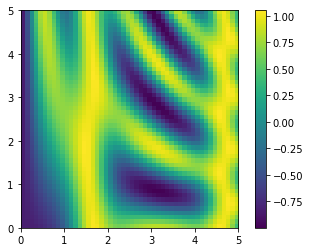

In [0]:
import numpy as np

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

#Aggregations: Min, Max, and Everything in Between


|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

##Summing the Values in an Array

In [0]:
import numpy as np
L = np.random.random(100)
sum(L)

56.82632982352202

In [0]:
np.sum(L)

56.82632982352202

In [0]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 161 ms per loop
1000 loops, best of 3: 348 µs per loop


In [0]:
import numpy as np
M = np.array([[1,2,3], [4,5,6], [7,8,9]])
draw_tbl([['M<br><br>' + array_to_html(M), '', 'M.sum(axis=1)<br><br>' + array_to_html(M.sum(axis=1))],
          ['M.sum(axis=0)<br><br>' + array_to_html(M.sum(axis=0)), '', 'M.sum()<br><br>' + str(M.sum())]])

##Minimum and Maximum

In [0]:
min(big_array), max(big_array)

(2.1726128461851957e-06, 0.9999998550028653)

In [0]:
np.min(big_array), np.max(big_array)

(2.1726128461851957e-06, 0.9999998550028653)

In [0]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 102 ms per loop
1000 loops, best of 3: 415 µs per loop


In [0]:
print(big_array.min(), big_array.max(), big_array.sum())

2.1726128461851957e-06 0.9999998550028653 499972.0791900162


In [0]:
import numpy as np
M = np.array([[1,2,3], [4,5,6], [7,8,9]])
draw_tbl([['M<br><br>' + array_to_html(M), '', 'M.min(axis=1)<br><br>' + array_to_html(M.min(axis=1))],
          ['M.min(axis=0)<br><br>' + array_to_html(M.min(axis=0)), '', 'M.min()<br><br>' + str(M.min())]])

#Comparisons, Masks, and Boolean Logic

##Comparison Operators as ufuncs

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

In [0]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
draw_tbl([[array_to_html(x), 'x'],
          [array_to_html(x < 3), 'x < 3'],
          [array_to_html(x > 3), 'x > 3'],
          [array_to_html(x <= 3), 'x <= 3'],
          [array_to_html(x == 3), 'x == 3'],
          [array_to_html(x != 3), 'x != 3'],
          [array_to_html(x >= 3), 'x >= 3'],
          [array_to_html((2 * x) == (x ** 2)), '(2 * x) == (x ** 2)']])

10-5,21-4,32-3,43-2,54-1,x
True0-5,True1-4,False2-3,False3-2,False4-1,x < 3
False0-5,False1-4,False2-3,True3-2,True4-1,x > 3
True0-5,True1-4,True2-3,False3-2,False4-1,x <= 3
False0-5,False1-4,True2-3,False3-2,False4-1,x == 3
True0-5,True1-4,False2-3,True3-2,True4-1,x != 3
False0-5,False1-4,True2-3,True3-2,True4-1,x >= 3
False0-5,True1-4,False2-3,False3-2,False4-1,(2 * x) == (x ** 2)


##Working with Boolean Arrays

In [0]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
draw_tbl([[array_to_html(x), 'x'],
          [array_to_html(x < 3), 'x < 3'],
          ['how many values less than 3?', 'np.count_nonzero(x < 3)<br>or<br>np.sum(x < 3)', np.count_nonzero(x < 3)],
          ['are there any values less than 3?', 'np.any(x < 3)', np.any(x < 3)],
          ['are all values less than 3?', 'np.all(x < 3)', np.all(x < 3)]])

In [0]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
draw_tbl([['M', 'M < 3'],
          [array_to_html(M), array_to_html(M < 3)],
          [{'text': 'np.any(M < 3, axis=0)', 'colspan':2}],
          [{'text': array_to_html(np.any(M < 3, axis=0)), 'colspan':2}]])

##Boolean Arrays as Masks

In [0]:
import numpy as np
x = np.array([1, 0, 2, 0, 3, 0, 4, 0, 5])
x1 = np.array([1, 0, 2, 0, 3, 0, 4, 0, 5], dtype=bool)
draw_tbl([[{'text': 'numpy supports boolean arrays', 'colspan':2}],
          [array_to_html(x),  'x = np.array([1, 0, 2, 0, 3, 0, 4, 0, 5])'],
          [array_to_html(x1), 'x = np.array([1, 0, 2, 0, 3, 0, 4, 0, 5], dtype=bool)']])

In [0]:
import numpy as np
x = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
y = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
draw_tbl([[array_to_html(x),  'x'],
          [array_to_html(y), 'y'],
          [array_to_html(x | y), 'x | y'],
          [array_to_html(x & y), 'x & y'],
          [array_to_html(~x), '~x']])

True0-6,False1-5,True2-4,False3-3,True4-2,False5-1,x
True0-6,True1-5,True2-4,False3-3,True4-2,True5-1,y
True0-6,True1-5,True2-4,False3-3,True4-2,True5-1,x | y
True0-6,False1-5,True2-4,False3-3,True4-2,False5-1,x & y
False0-6,True1-5,False2-4,True3-3,False4-2,True5-1,~x


**Note:** be careful, do not use `and`, `or` on arrays

In [0]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [0]:
print("ERROR SHOULD BE GENERATED")
(x > 4) & (x < 8)

ERROR SHOULD BE GENERATED


array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [0]:
import numpy as np
i = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
x = np.array([3, 7, 5, 1, 1, 12])
draw_tbl([[{'text':'boolean array to index another array', 'colspan':2}],
          [array_to_html(i),  'i'],
          [array_to_html(x), 'x'],
          [array_to_html(x[i]), 'x[i]']])

In [0]:
import numpy as np
hp = np.array([70, 120, 180, 80, 74, 110])
cylinders = np.array([4, 6, 6, 4, 4, 6])
draw_tbl([[{'text':'choose data by certain property', 'colspan':3}],
          [array_to_html(hp),  'hp', 'horsepowers'],
          [array_to_html(cylinders), 'cylinders', 'number of cylinders'],
          [array_to_html(hp[cylinders == 4]), 'hp[cylinders == 4]', 'horsepowers for cars with 4 cylinders']])

#Fancy Indexing

##Exploring Fancy Indexing

In [0]:
import numpy as np
x = np.array([1, -1, 2, -2, 3, -3, 4, -4])
idx = np.array([0, 2, 4, 6])
draw_tbl([[{'text': 'The boring way', 'colspan':2}],
          [array_to_html(x),  'x = np.array([1, -1, 2, -2, 3, -3, 4, -4])'],
          [array_to_html(np.array([x[0], x[2], x[4], x[6]])), 'np.array([x[0], x[2], x[4], x[6]])'],
          [{'text': 'The fancy indexing way', 'colspan':2}],
          [array_to_html(idx), 'idx = np.array([0, 2, 4, 6])'],
          [array_to_html(x[idx]), 'x[idx]']])

In [0]:
import numpy as np
x = np.array([1, -1, -2, 2, 3, -3, -4, 4])
idx = np.array([[0, 3, 4, 7], [1, 2, 5, 6]])
draw_tbl([[{'text': 'result accomodates shape of the indexer', 'colspan':2}],
          [array_to_html(x),  'x = np.array([1, -1, 2, -2, 3, -3, 4, -4])'],
          [array_to_html(idx), 'idx = np.array([[0, 2, 4, 6], [1, 3, 5, 7]])'],
          [array_to_html(x[idx]), 'x[idx]']])

In [0]:
import numpy as np
x = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

draw_tbl([[{'text': 'indexing 2D array', 'colspan':2}],
          ['np.arange(12).reshape((3, 4))', 'row = np.array([0, 1, 2])'],
          [{'text': array_to_html(x), 'rowspan':5}, array_to_html(row)],
          ['col = np.array([2, 1, 3])'],
          [array_to_html(col)],
          ['x[row, col]'],
          [array_to_html(x[row, col])]])

In [0]:
import numpy as np
x = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

draw_tbl([[{'text': 'fancy indexing follows broadcast rules', 'colspan':3}],
          ['np.arange(12).reshape((3, 4))', 'row = np.array([0, 1, 2])', 'x[row[:, np.newaxis], col]'],
          [{'text': array_to_html(x), 'rowspan':3}, array_to_html(row), {'text': array_to_html(x[row[:, np.newaxis], col]), 'rowspan':3}],
          ['col = np.array([2, 1, 3])'],
          [array_to_html(col)]])

##Combined Indexing

In [0]:
import numpy as np
x = np.arange(12).reshape((3, 4))
row = np.array([0, 2, 1], dtype=int)
mask = np.array([True, False, True, False], dtype=bool)

publish_slides([envelope_tbl([[{'text': 'fancy and simple indices', 'colspan':2}],
          ['np.arange(12).reshape((3, 4))', 'x[2, [2, 0, 1]]'],
          [array_to_html(x), array_to_html(x[2, [2, 0, 1]])]]),
                envelope_tbl([[{'text': 'fancy indexing with slicing', 'colspan':2}],
          ['np.arange(12).reshape((3, 4))', 'x[1:, [2, 0, 1]]'],
          [array_to_html(x), array_to_html(x[1:, [2, 0, 1]])]]),
                envelope_tbl([[{'text': 'fancy indexing with masking', 'colspan':2}],
          ['np.arange(12).reshape((3, 4))', 'row = np.array([0, 2, 1], dtype=int)<br>mask = np.array([True, False, True, False], dtype=bool)<br>x[row[:, np.newaxis], mask]'],
          [array_to_html(x), array_to_html(x[row[:, np.newaxis], mask])]]) ])

##Modifying Values with Fancy Indexing

In [0]:
import numpy as np
x = np.arange(10)
idx = np.array([1, 3, 3, 5, 5, 5, 7, 7, 9])
x_old = x.copy()
x[idx] = 25
x_old1 = x.copy()
x[idx] -= 15
x_old2 = x.copy()
np.add.at(x, idx, 1)
draw_tbl([[array_to_html(x_old),  'x = np.arange(10)'],
          [array_to_html(idx), 'idx = np.array([1, 3, 3, 5, 5, 5, 7, 7, 9])'],
          [{'text': 'x[idx] = 25', 'colspan': 2}],
          [array_to_html(x_old1), 'x'],
          [{'text': 'x[idx] -= 15 # NO ACCUMULATION', 'colspan': 2}],
          [array_to_html(x_old2), 'x'],
          [{'text': 'np.add.at(x, idx, 1) # ACCUMULATION', 'colspan': 2}],
          [array_to_html(x), 'x']])

In [0]:
import numpy as np

x = np.zeros(10, dtype=int)
val = np.arange(1,10)
idx = np.array([1, 3, 3, 5, 5, 5, 7, 7, 9])
x_old = x.copy()
x[idx] = val

draw_tbl([[array_to_html(x_old),  'x = np.zeros(10, dtype=int)'],
          [array_to_html(idx), 'idx = np.array([1, 3, 3, 5, 5, 5, 7, 7, 9])'],
          [array_to_html(val), 'val = np.arange(1,10)'],
          [{'text': 'x[idx] = val # watch repeated indices', 'colspan': 2}],
          [array_to_html(x), 'x']])

#Sorting Arrays

##Fast Sorting in NumPy: np.sort and np.argsort

In [5]:
import numpy as np 
x = np.array([2, 1, 4, 3, 5])
y = np.sort(x)
x_old = x.copy()
x.sort()

draw_tbl([[array_to_html(x_old),  'x = np.array([2, 1, 4, 3, 5]))'],
          [array_to_html(y), 'y = np.sort(x)'],
          [{'text': 'x.sort()', 'colspan': 2}],
          [array_to_html(x), 'x']])

In [6]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)

draw_tbl([[array_to_html(x),  'x = np.array([2, 1, 4, 3, 5]))'],
          [array_to_html(i), 'i = np.argsort(x)'],
          [array_to_html(x[i]), 'x[i]']])

20-5,11-4,42-3,33-2,54-1,"x = np.array([2, 1, 4, 3, 5]))"
10-5,01-4,32-3,23-2,44-1,i = np.argsort(x)
10-5,21-4,32-3,43-2,54-1,x[i]


In [19]:
x = np.random.randint(0, 10, (3, 4))

draw_tbl([['x = rand.randint(0, 10, (4, 6))', 'np.sort(X, axis=0)', 'np.sort(X, axis=1)'],
          [array_to_html(x), array_to_html(np.sort(x, axis=0)), array_to_html(np.sort(x, axis=1))]])

In [21]:
x = np.array([7, 2, 3, 1, 6, 5, 4])

draw_tbl([[array_to_html(x),  'x = np.array([7, 2, 3, 1, 6, 5, 4])'],
          [array_to_html(np.sort(x)), 'np.sort(x)'],
          [{'text': 'bring smaller numbers to the front', 'colspan':2}],
          [array_to_html(np.partition(x, 1)), 'np.partition(x, 1)'],
          [array_to_html(np.partition(x, 2)), 'np.partition(x, 2)'],
          [array_to_html(np.partition(x, 3)), 'np.partition(x, 3)'],
          [array_to_html(np.partition(x, 4)), 'np.partition(x, 4)']
          ])

**Note:** `axis` argument works

##Example: k-Nearest Neighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


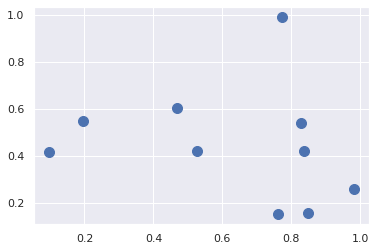

In [0]:
import numpy as np

X = np.random.rand(10, 2)

import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [0]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq.diagonal() # check that each point has 0 distance to itself

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 8 6 9 7 4 3 1 5 2]
 [1 5 3 7 4 9 0 2 8 6]
 [2 4 3 9 7 1 6 8 0 5]
 [3 7 1 4 9 5 2 0 8 6]
 [4 9 6 7 3 8 0 2 1 5]
 [5 1 3 7 0 4 9 8 2 6]
 [6 8 9 0 4 7 3 2 1 5]
 [7 3 9 4 1 0 8 5 6 2]
 [8 0 6 9 4 7 3 1 5 2]
 [9 4 6 8 0 7 3 2 1 5]]


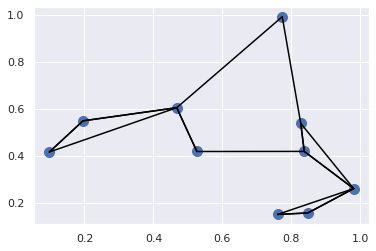

In [0]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
  for j in nearest_partition[i, :K+1]:
    # plot a line from X[i] to X[j]
    # use some zip magic to make it happen:
    plt.plot(*zip(X[j], X[i]), color='black')

#Structured Data: NumPy’s Structured Arrays

In [0]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [13]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})
print(data.dtype)


[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


"('', 0, 0.)0-4","('', 0, 0.)1-3","('', 0, 0.)2-2","('', 0, 0.)3-1"


In [16]:
data['name'] = name
data['age'] = age
data['weight'] = weight
visualize_array(data)

"('Alice', 25, 55.)0-4","('Bob', 45, 85.5)1-3","('Cathy', 37, 68.)2-2","('Doug', 19, 61.5)3-1"


In [0]:
# Get all names
print(data['name'])
# Get first row of data
print(data[0])
# Get the name from the last row
print(data[-1]['name'])
print(data[data['age'] < 30]['name'])

##Creating Structured Arrays

| Character        | Description           | Example                             |
| ---------        | -----------           | -------                             | 
| ``'b'``          | Byte                  | ``np.dtype('b')``                   |
| ``'i'``          | Signed integer        | ``np.dtype('i4') == np.int32``      |
| ``'u'``          | Unsigned integer      | ``np.dtype('u1') == np.uint8``      |
| ``'f'``          | Floating point        | ``np.dtype('f8') == np.int64``      |
| ``'c'``          | Complex floating point| ``np.dtype('c16') == np.complex128``|
| ``'S'``, ``'a'`` | String                | ``np.dtype('S5')``                  |
| ``'U'``          | Unicode string        | ``np.dtype('U') == np.str_``        |
| ``'V'``          | Raw data (void)       | ``np.dtype('V') == np.void``        |

In [0]:
np.dtype({'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})

In [0]:
np.dtype({'names':('name', 'age', 'weight'),
'formats':((np.str_, 10), int, np.float32)})

In [0]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

In [0]:
np.dtype('S10,i4,f8')

##More Advanced Compound Types

In [0]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

##RecordArrays: Structured Arrays with a Twist

In [17]:
print(data['age'])
data_rec = data.view(np.recarray)
print(data_rec.age) # fields can be accessed as attributes

[25 45 37 19]
[25 45 37 19]


In [18]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

The slowest run took 66.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 153 ns per loop
The slowest run took 18.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.02 µs per loop
The slowest run took 8.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.93 µs per loop


# Few points to recall

**flatten() and ravel()**

In [0]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.flatten()
print("Flattened array:")
print(y)

z = x.ravel()
print("Raveled array:")
print(z)

y[0] = 123
z[1] = 987

print("X:")
print(x)
print("Y:")
print(y)
print("Z:")
print(z)

**transpose does not copy**

In [0]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.transpose(0, 1)
print("After setting axes order to (0, 1) nothing should be changed:")
print(y)

z = x.transpose(1, 0)
print("After setting axes order to (1, 0) we get transposed array:")
print(z)

In [0]:
x = np.arange(2 * 3 * 2 * 3).reshape(2, 3, 2, 3)
print("Input array:")
print(x)

y = x.transpose(2, 0, 1, 3)
print("After setting axes order to (2, 0, 1, 3):")
print(y)

print("Comparing x[1, 2, 0, 2] and y[0, 1, 2, 2]:")
print(x[1, 2, 0, 2] == y[0, 1, 2, 2])

In [0]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.T
print("In case of 2-dimentional array we can use np.ndarray.T method for transposing:")
print(y)

In [0]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.transpose(1, 0)
y[:] = 500

print("X after setting all values of transposed array to 500:")
print(x)

print("Y after setting all values of transposed array to 500:")
print(y)

**broadcasting with many axis**

In [0]:
a = np.arange(2 * 3 * 4).reshape(2, 3, 4)

b1 = a.reshape(1, 2, 1, 3, 4)
b2 = (a * 1000).reshape(2, 1, 3, 1 ,4)

print("b1 shape:", b1.shape)
print("b2 shape:", b2.shape)
print("b1+b2 shape:", (b1+b2).shape)

#visualize_array(b1)

b1 shape: (1, 2, 1, 3, 4)
b2 shape: (2, 1, 3, 1, 4)
b1+b2 shape: (2, 2, 3, 3, 4)


**numerical derivative (x[1:] - x[:-1]) / dt**

In [0]:
x = np.arange(3 * 4).reshape(3, 4)**2
dt0 = 1e-5
dt1 = 1e-5

print("Input x:")
print(x)

print("dx/dt0 (partial over axis=0):")
print((x[1:]-x[:-1]) / dt0)

print("dx/dt1 (partial over axis=1):")
print((x[:, 1:]-x[:, :-1]) / dt1)